In [2]:
import torch

# pip install jupyterthemes
##Turn on the dark mode 
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import time
from tqdm import tqdm
import os
import pickle
import RNN_multitask_utils as rn


GPU available on Mac: mps


### Define network

In [3]:
# network parameters
step_n=2000
neuron_n = 2**14  # number of nodes
g_scale = 1.0     # std of recurrent couplings (fix to 1)
J_bias = 0.5      # mean of recurrent couplings
theta = 1         # threshold
mu=0.52           # mean of external input at baseline
c = 5             # transfer function gain (equivalent to std of recurrent couplings)
replica_n = 1     # number of replicas
time_slice = 1.0  #size of discretized time step
act_type = 2        #activation function type, act_type = 1 (tanh), 2(sigmoid), 3(ReLU)
sigma_ind = 0.195   # baseline variance
initial_var=0.1  # variance of initial condition
N=neuron_n

parameters1={"neuron_n":neuron_n,"replica_n":replica_n,"step_n":step_n,"time_slice":time_slice,"act_type":act_type} 
print(parameters1)

{'neuron_n': 16384, 'replica_n': 1, 'step_n': 2000, 'time_slice': 1.0, 'act_type': 2}


### simulations

Load doubleFP J. For each task, run ntrials per stimulus class with random initial conditions.

Protocol: Pick mu, sigma = task rule. Wait stim_offset steps, present stim for stim_dur (each trial has a jittered mu for that stimulus class to introduce variability), evolve for some more steps.

Goal: collect enough trials to train an LDA decoder to calculate the readout direction in each task rule.

{'neuron_n': 16384, 'replica_n': 1, 'step_n': 400, 'time_slice': 1.0, 'act_type': 2}
running # tasks=1
using J from input
use quenched noise from input


 80%|████████  | 321/400 [00:02<00:00, 122.88it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 139.94it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 79%|███████▉  | 316/400 [00:01<00:00, 147.38it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 171.09it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 79%|███████▉  | 315/400 [00:02<00:00, 133.84it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 145.03it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 81%|████████▏ | 325/400 [00:02<00:00, 131.43it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 142.83it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|███████▉  | 318/400 [00:02<00:00, 126.58it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 149.73it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 81%|████████  | 323/400 [00:02<00:00, 138.06it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 146.68it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 78%|███████▊  | 311/400 [00:01<00:00, 134.45it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 147.49it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 79%|███████▉  | 317/400 [00:01<00:00, 131.07it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 151.45it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 328/400 [00:02<00:00, 146.80it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 152.24it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 326/400 [00:02<00:00, 136.88it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 141.58it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|███████▉  | 318/400 [00:02<00:00, 134.85it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 151.77it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 78%|███████▊  | 313/400 [00:02<00:00, 134.64it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 141.38it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 328/400 [00:02<00:00, 141.70it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 146.58it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 329/400 [00:01<00:00, 144.95it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 159.76it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 79%|███████▉  | 317/400 [00:02<00:00, 145.72it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 148.61it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 81%|████████  | 324/400 [00:02<00:00, 135.82it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 144.79it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 79%|███████▉  | 317/400 [00:02<00:00, 136.71it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 151.16it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 328/400 [00:02<00:00, 147.87it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 147.49it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 327/400 [00:02<00:00, 146.57it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 148.33it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|████████  | 322/400 [00:01<00:00, 139.36it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 157.96it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|███████▉  | 319/400 [00:02<00:00, 143.26it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 149.27it/s]
/Users/mazzu/My Drive/Neuroscience/PROJECTS/Ogawasan/github/RNN_multitask_utils.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nplots,1, figsize=(30,10))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 328/400 [00:02<00:00, 142.63it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 148.28it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 79%|███████▉  | 315/400 [00:02<00:00, 139.01it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 141.88it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 81%|████████▏ | 325/400 [00:02<00:00, 138.82it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 141.61it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|███████▉  | 318/400 [00:01<00:00, 141.05it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 159.25it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 327/400 [00:02<00:00, 126.09it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 144.88it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 326/400 [00:02<00:00, 141.43it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 149.77it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|████████  | 320/400 [00:02<00:00, 128.97it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 141.30it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|████████  | 322/400 [00:02<00:00, 140.83it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 147.46it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|████████  | 321/400 [00:01<00:00, 148.01it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 162.35it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 326/400 [00:02<00:00, 126.96it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 145.15it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|████████  | 320/400 [00:02<00:00, 143.65it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 150.21it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 80%|████████  | 321/400 [00:02<00:00, 140.79it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 136.82it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 78%|███████▊  | 312/400 [00:02<00:00, 125.33it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 137.82it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 326/400 [00:02<00:00, 146.62it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 151.60it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 82%|████████▏ | 328/400 [00:02<00:00, 133.66it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 139.06it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 81%|████████  | 323/400 [00:01<00:00, 147.17it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 156.95it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 81%|████████  | 323/400 [00:02<00:00, 126.39it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 141.74it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 81%|████████  | 323/400 [00:02<00:00, 120.11it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 142.88it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon
running # tasks=1
using J from input
use quenched noise from input


 79%|███████▉  | 316/400 [00:01<00:00, 145.96it/s]

end of stim0


100%|██████████| 400/400 [00:02<00:00, 158.59it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hozon


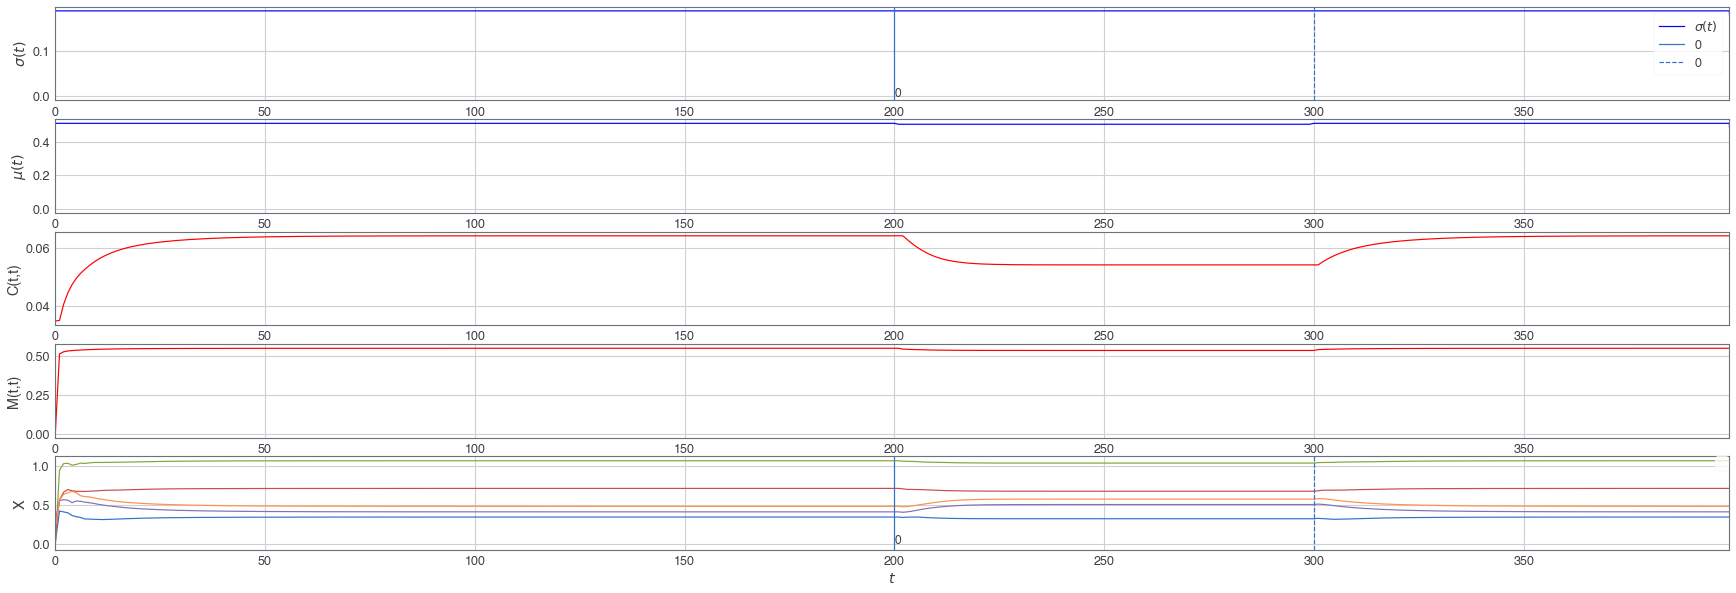

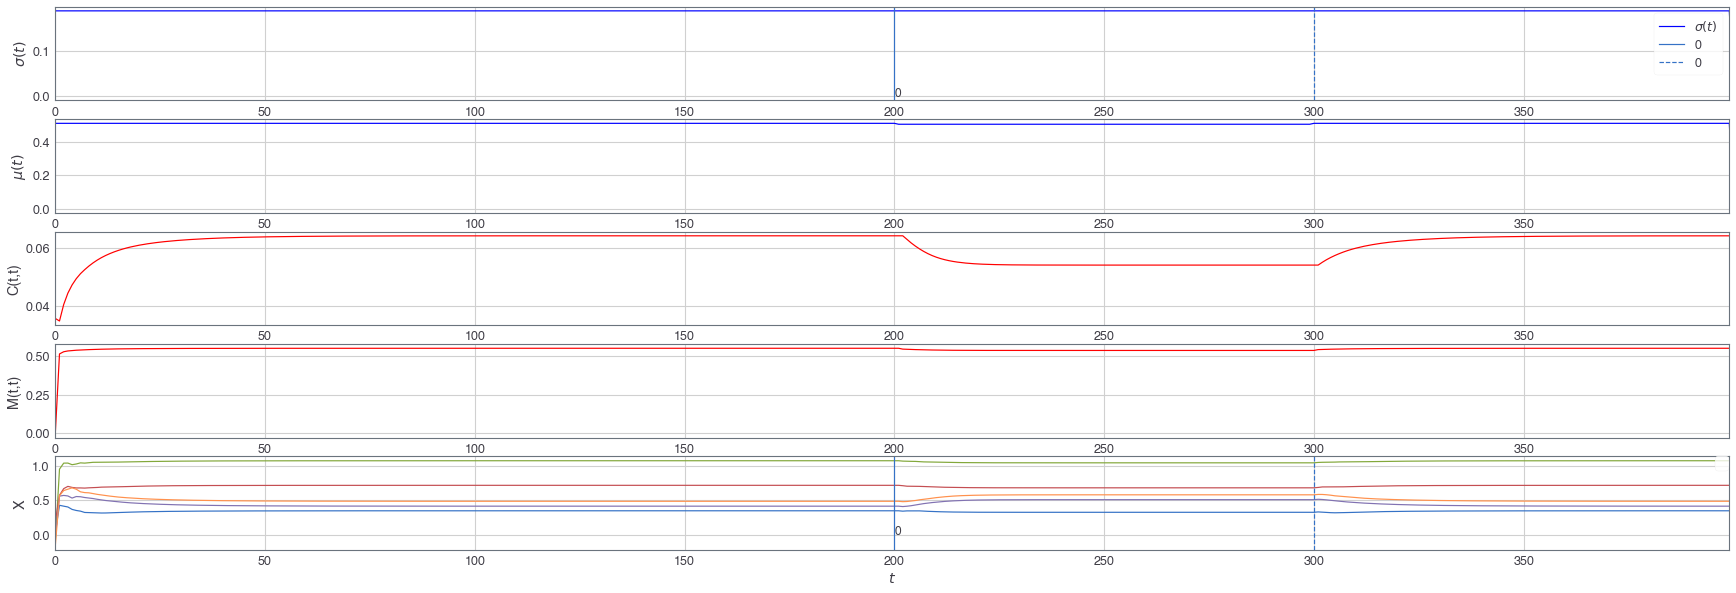

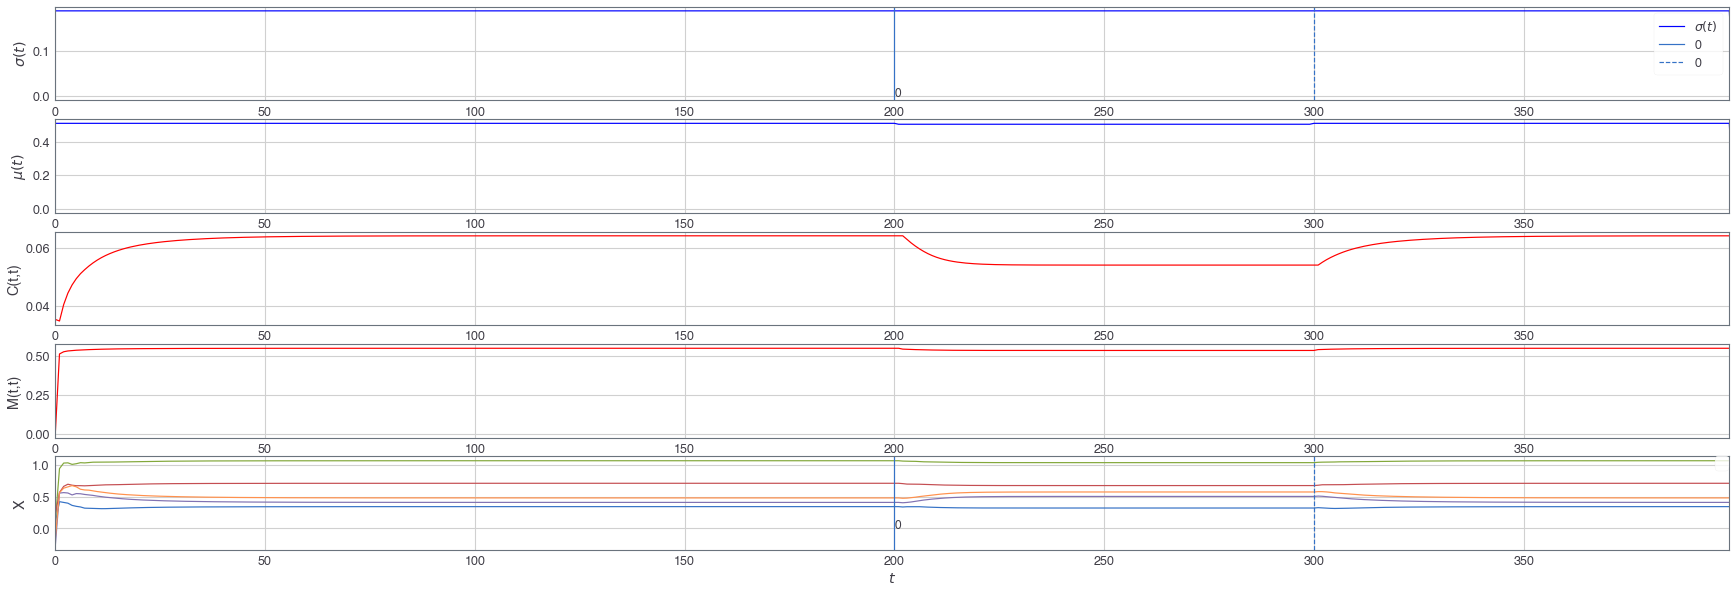

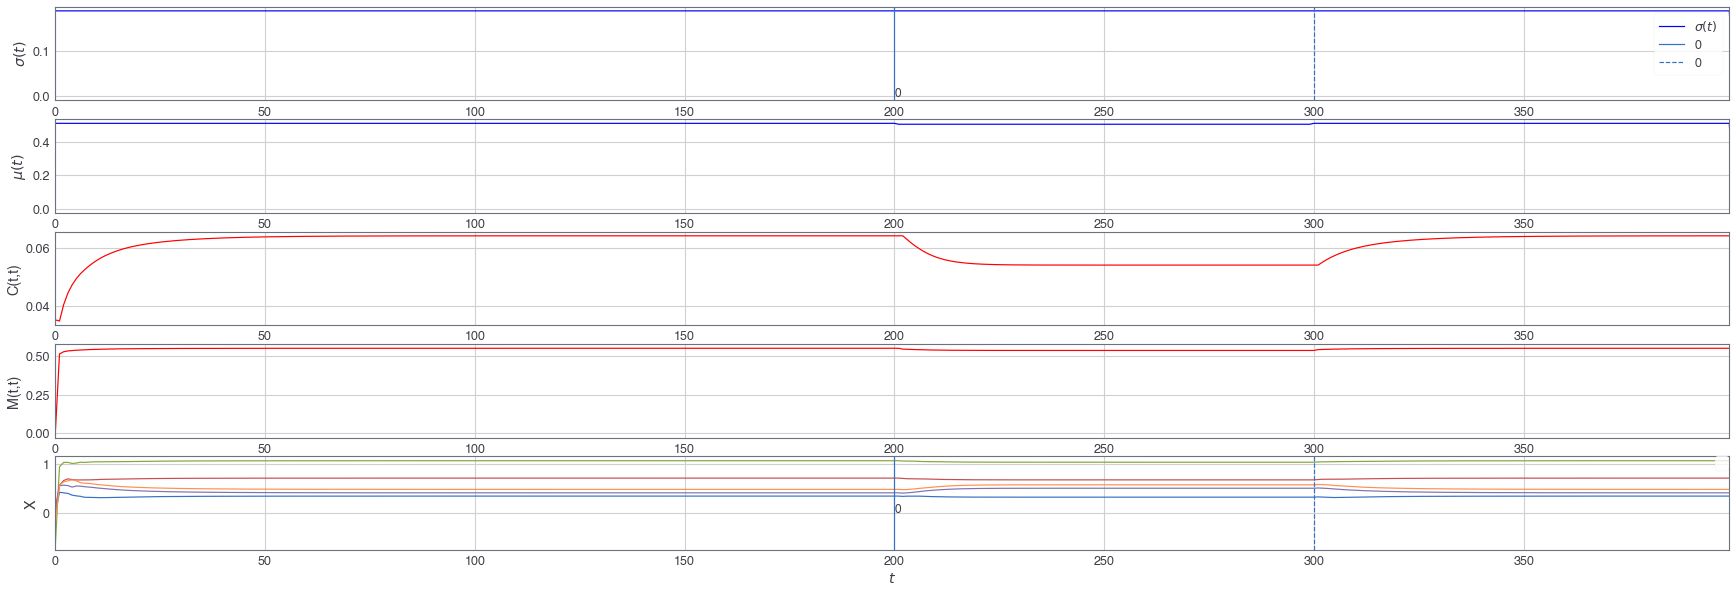

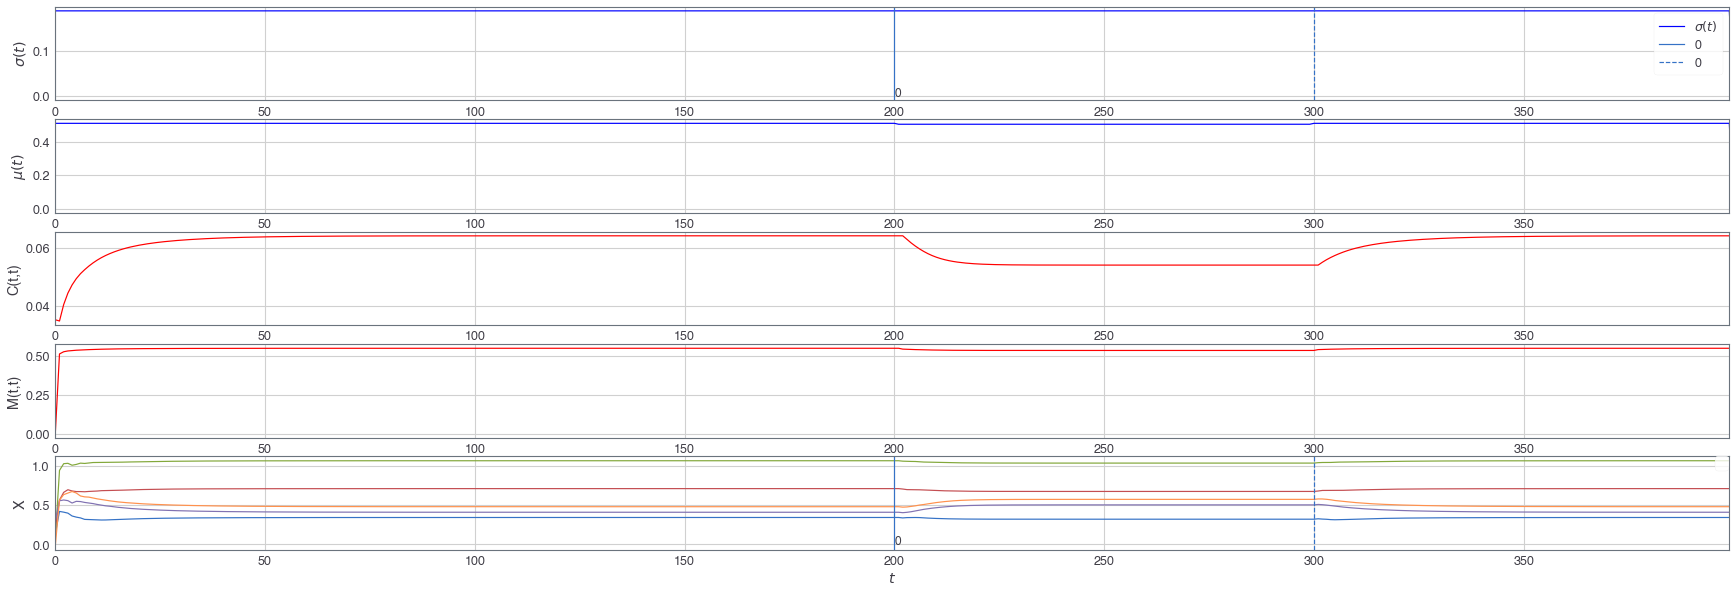

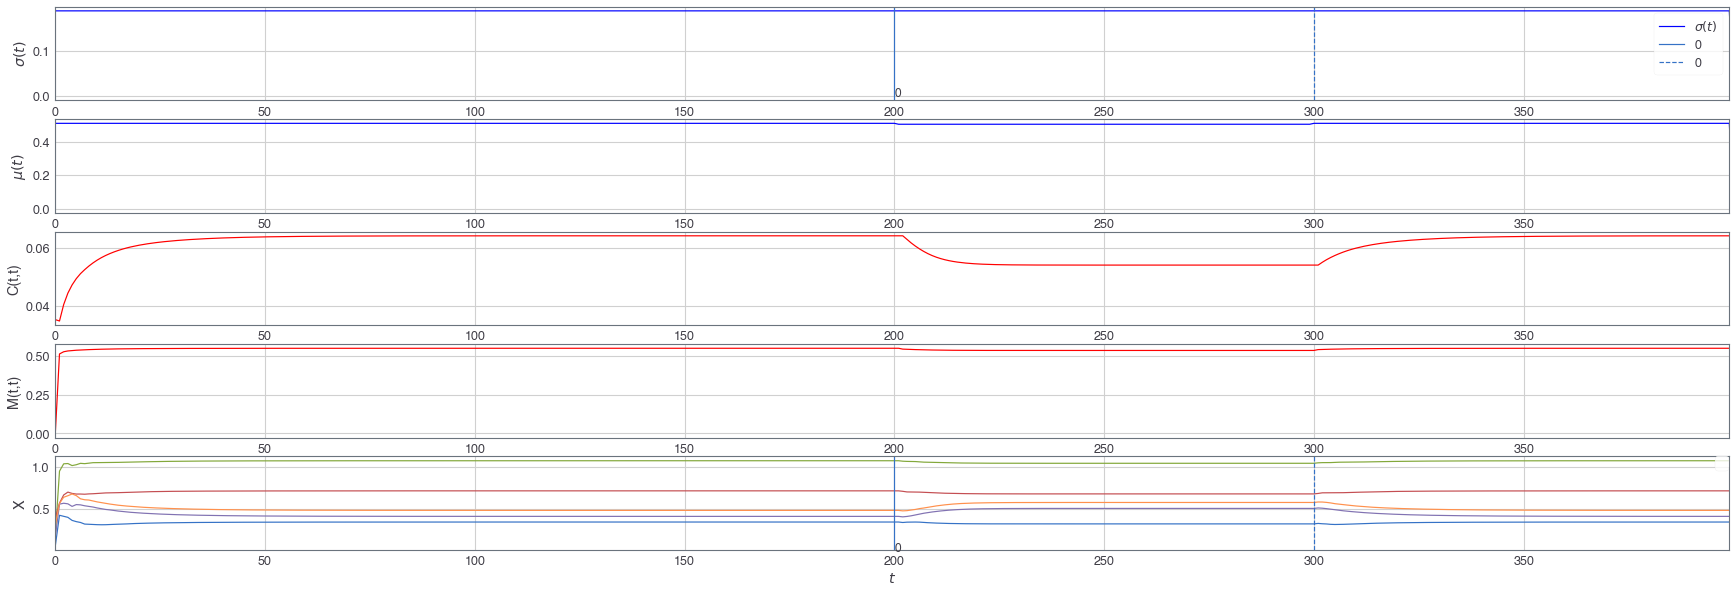

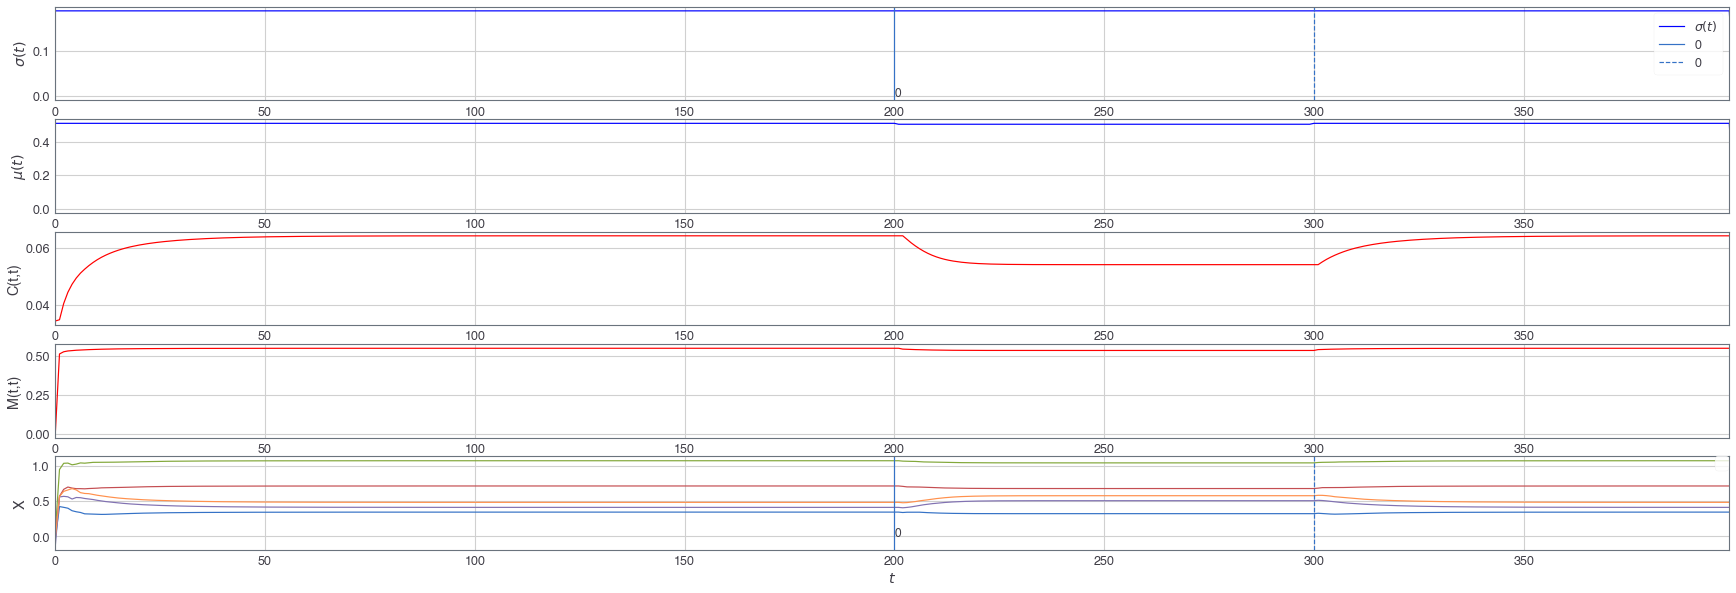

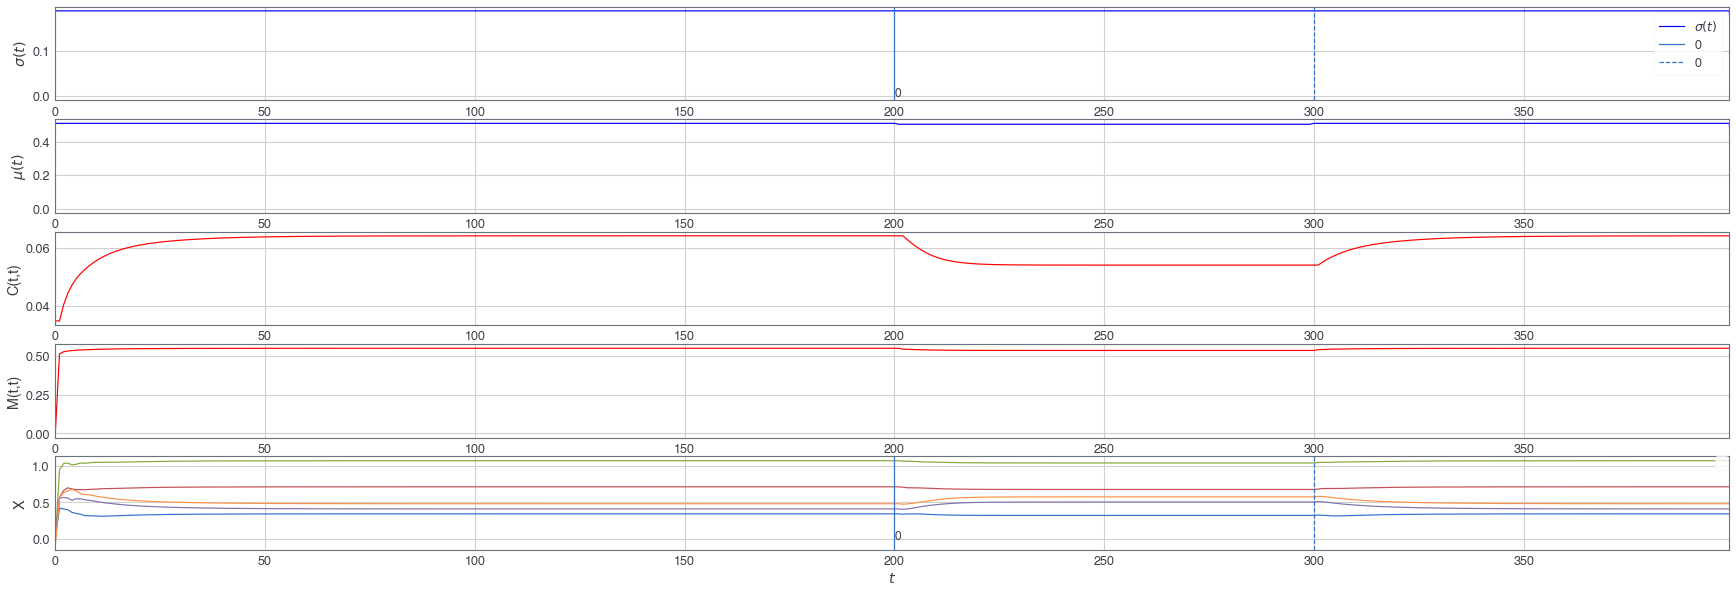

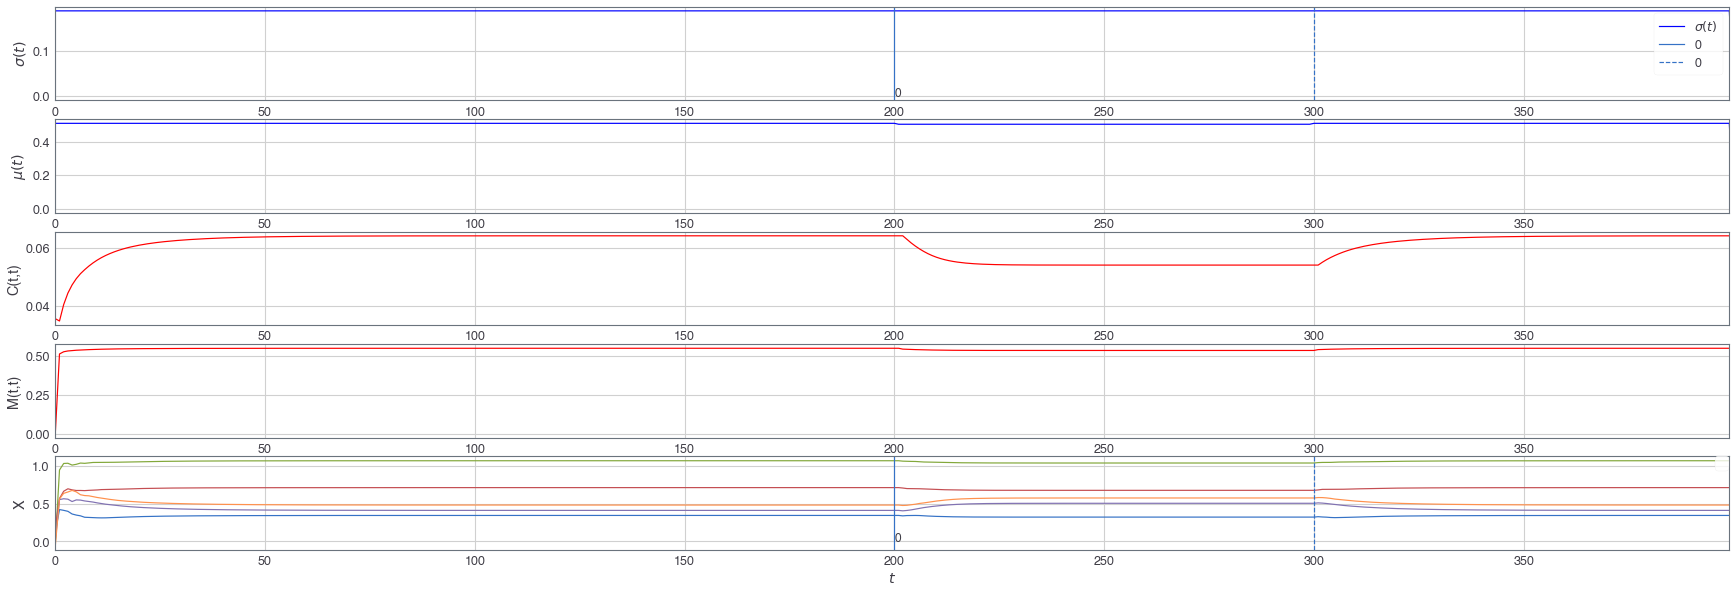

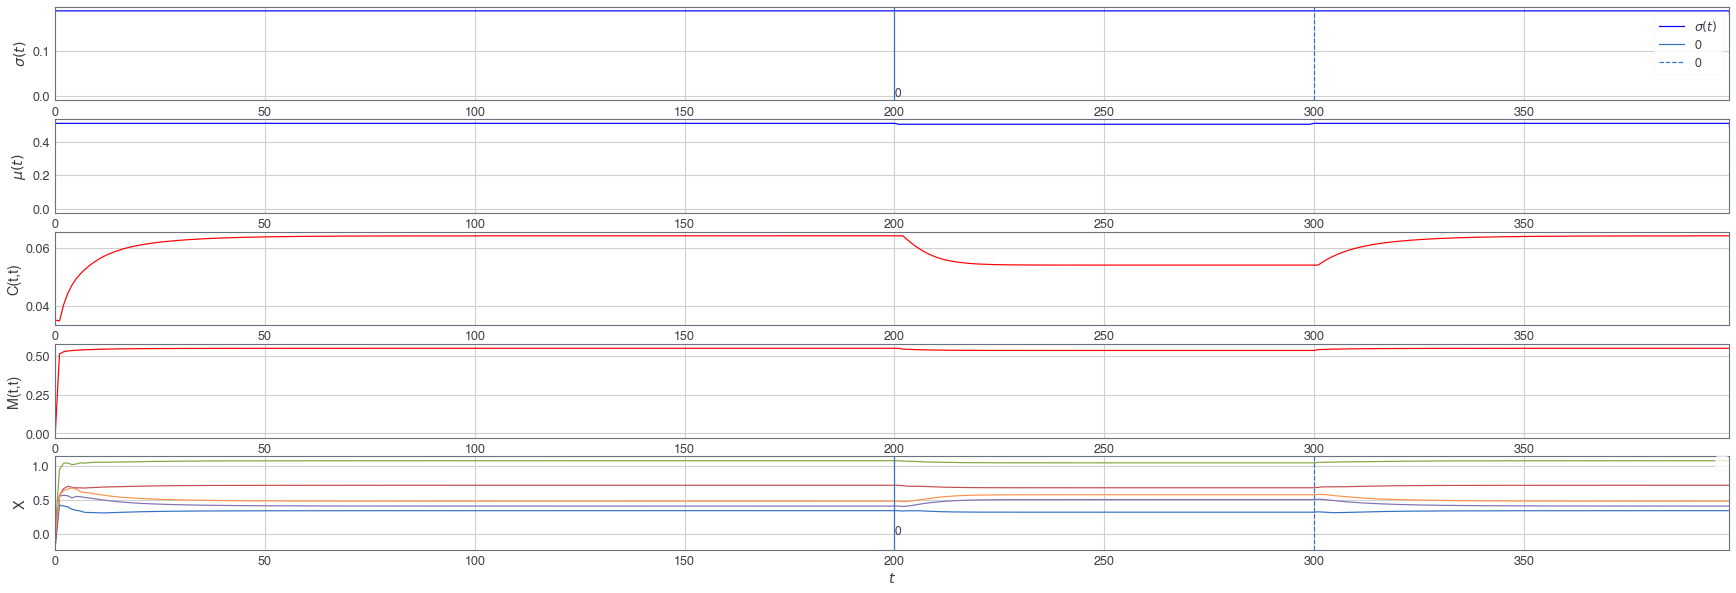

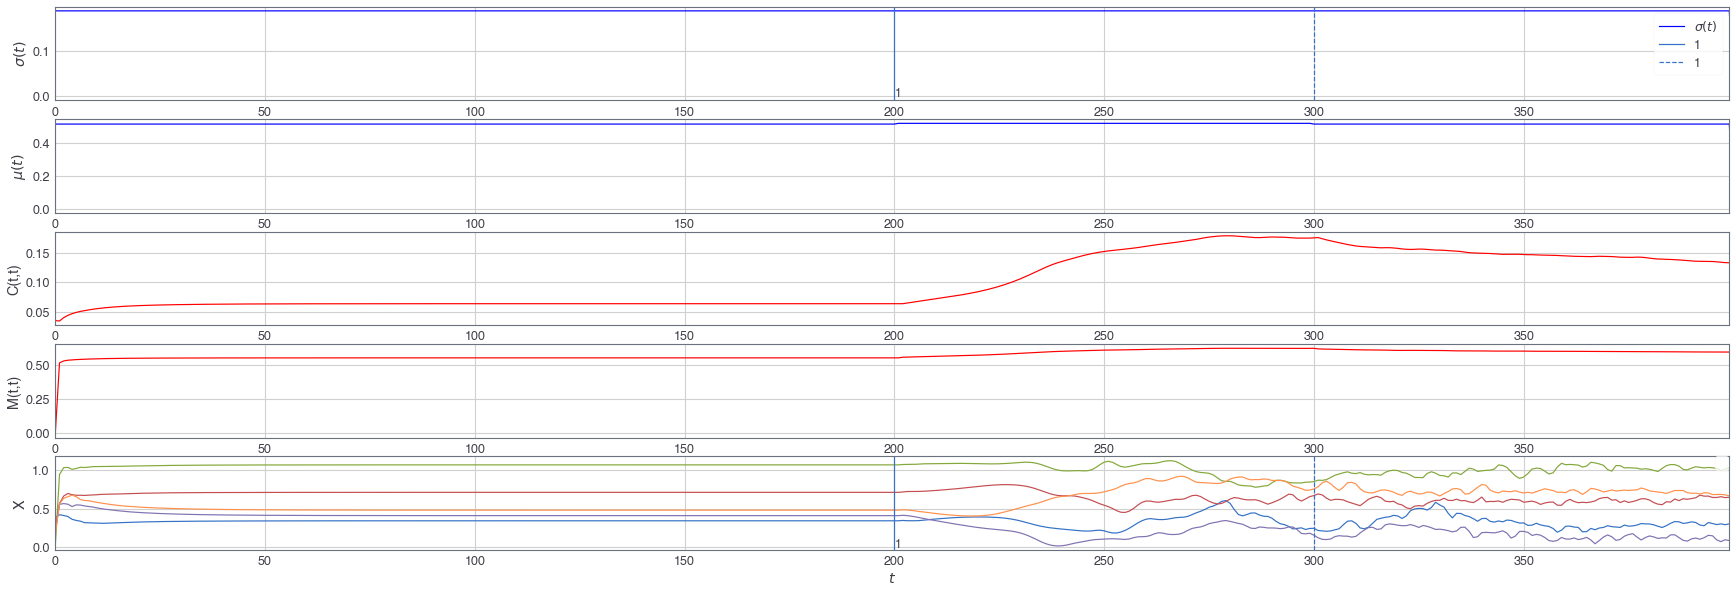

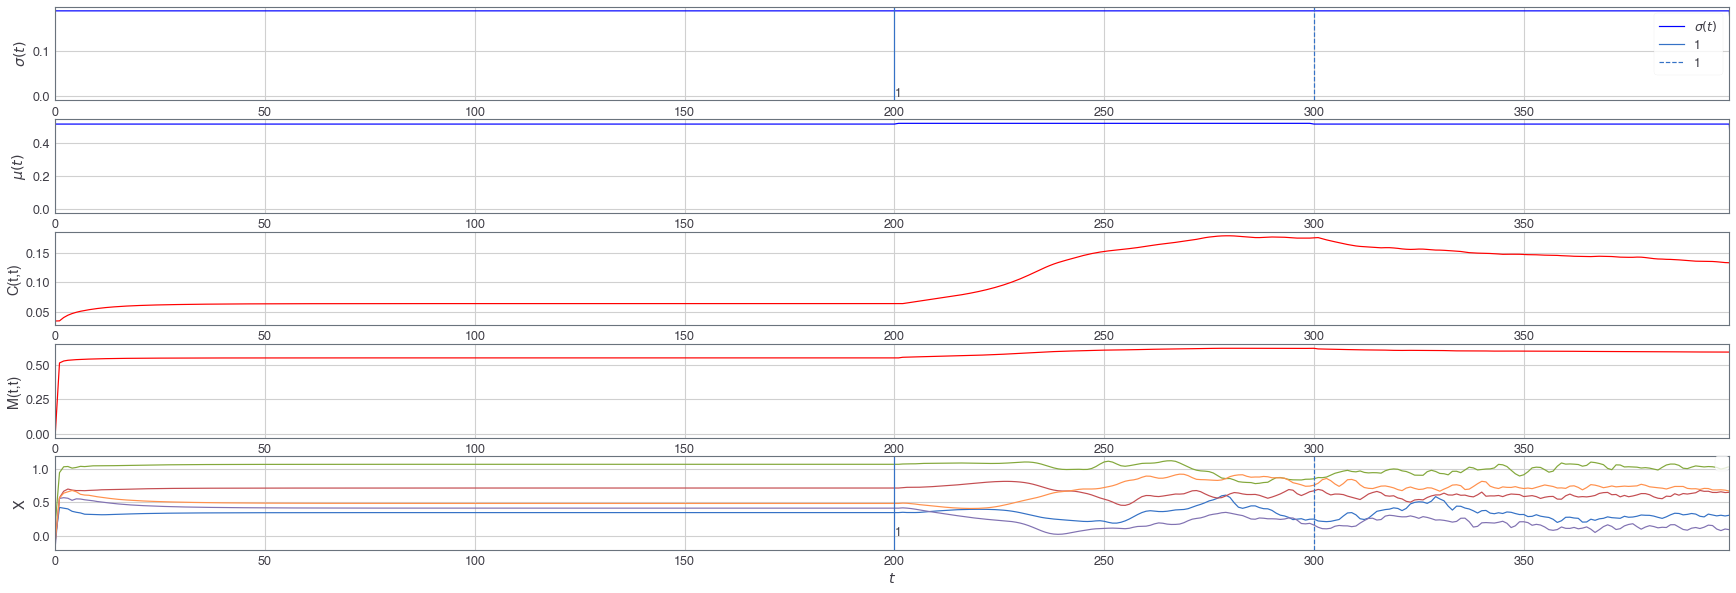

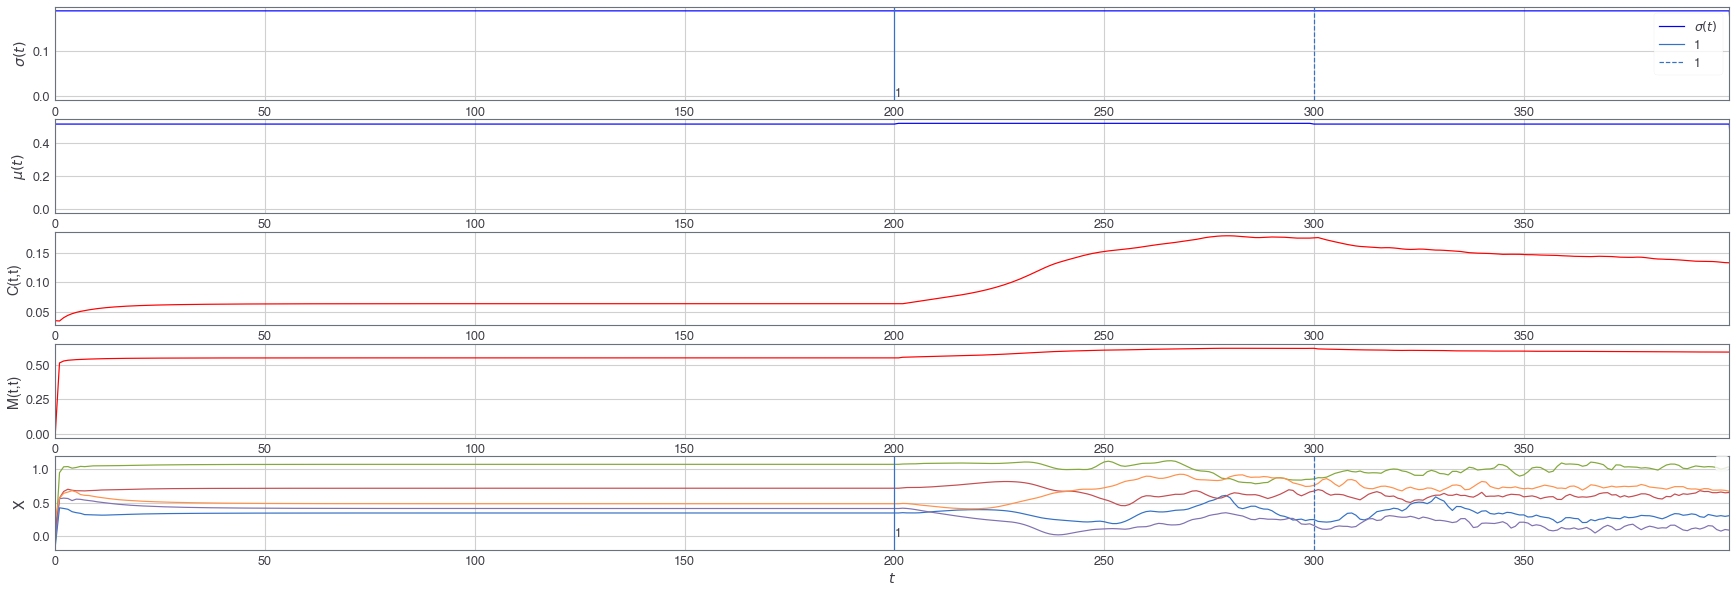

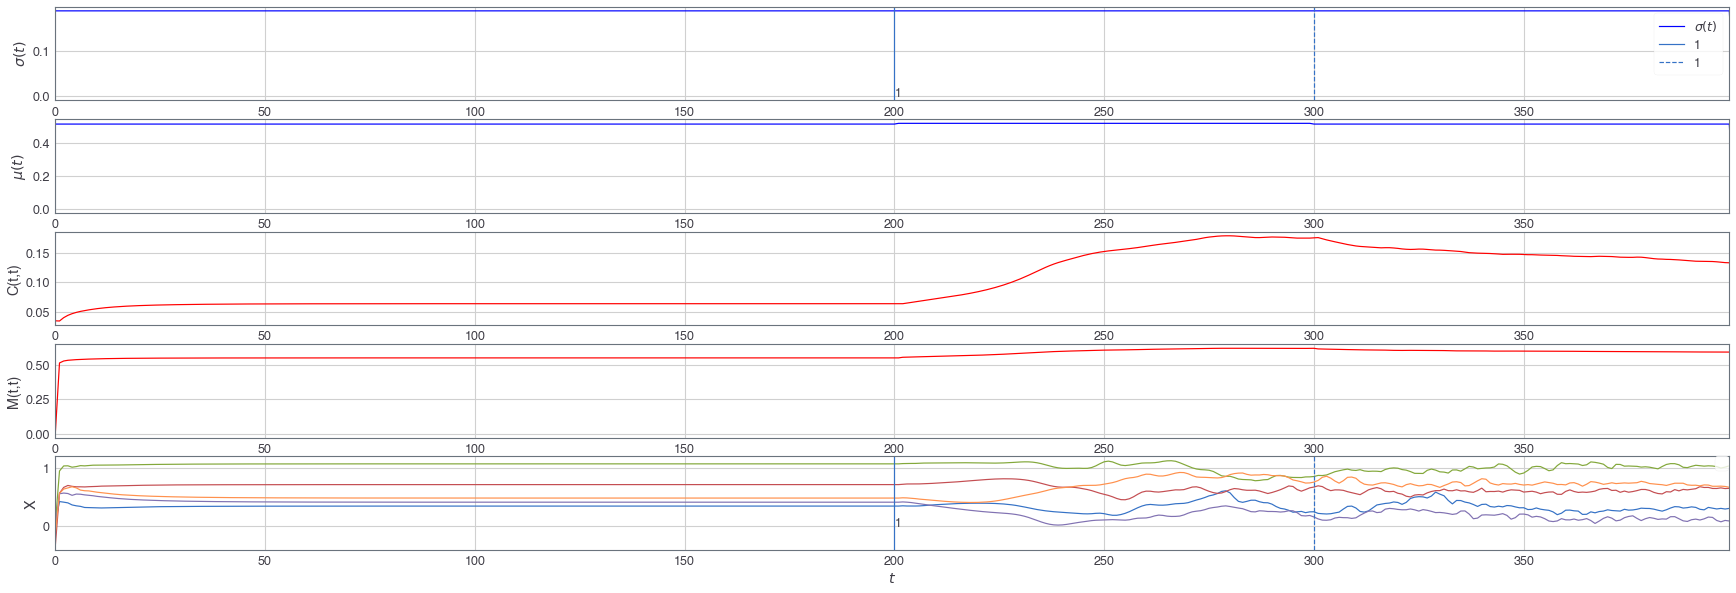

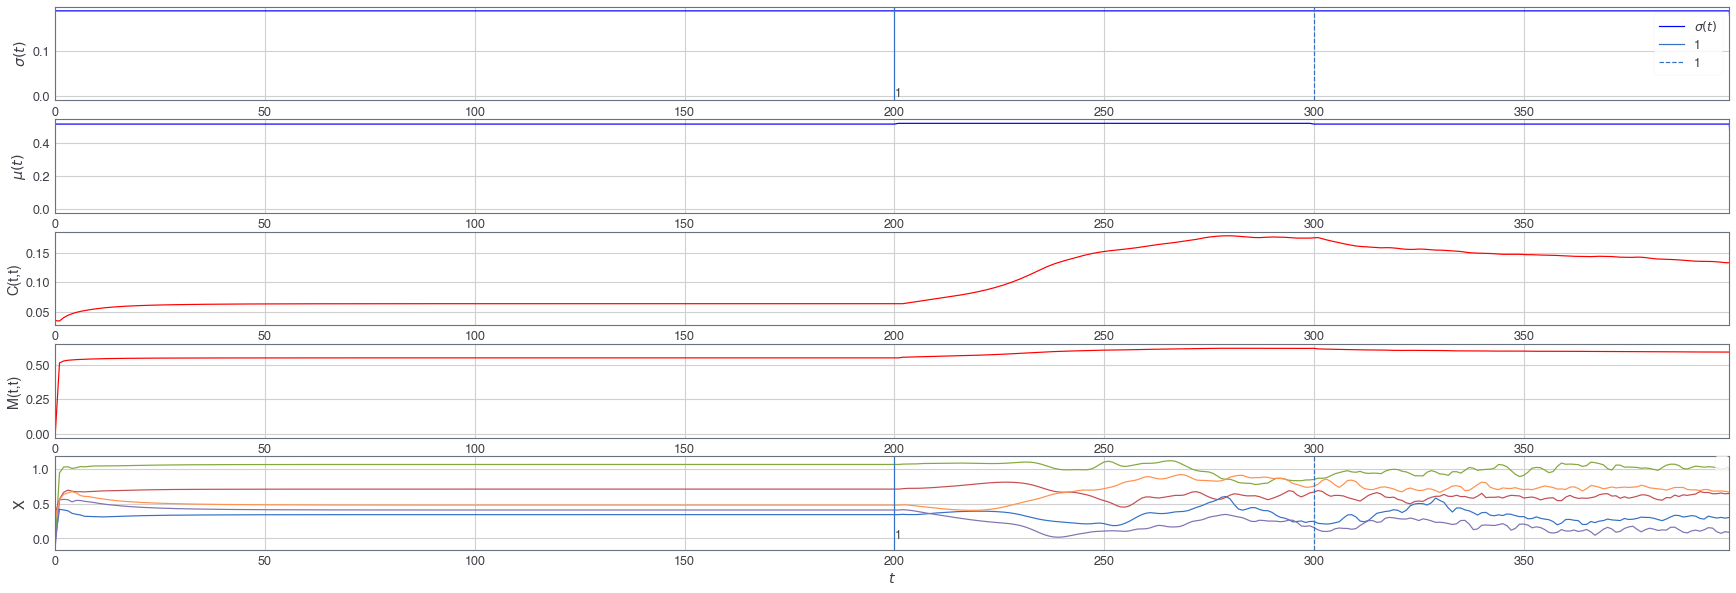

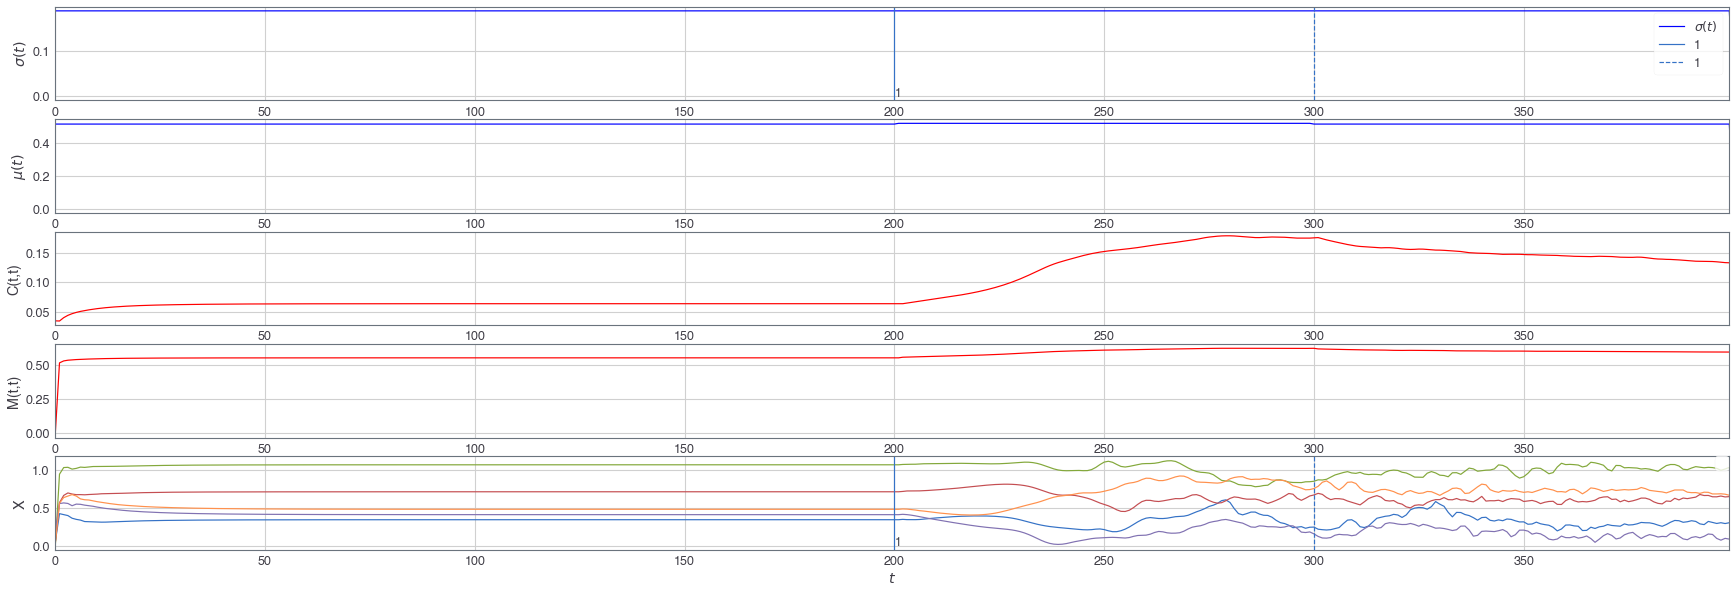

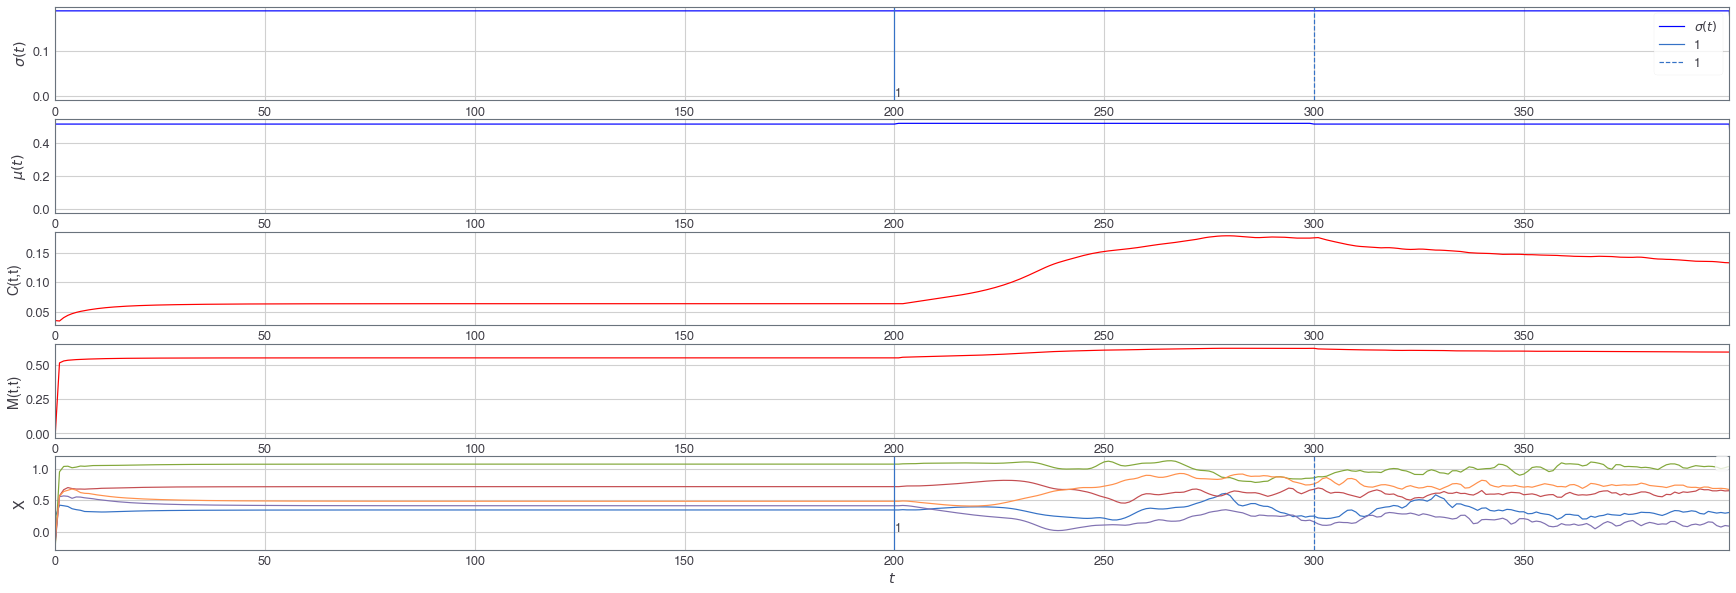

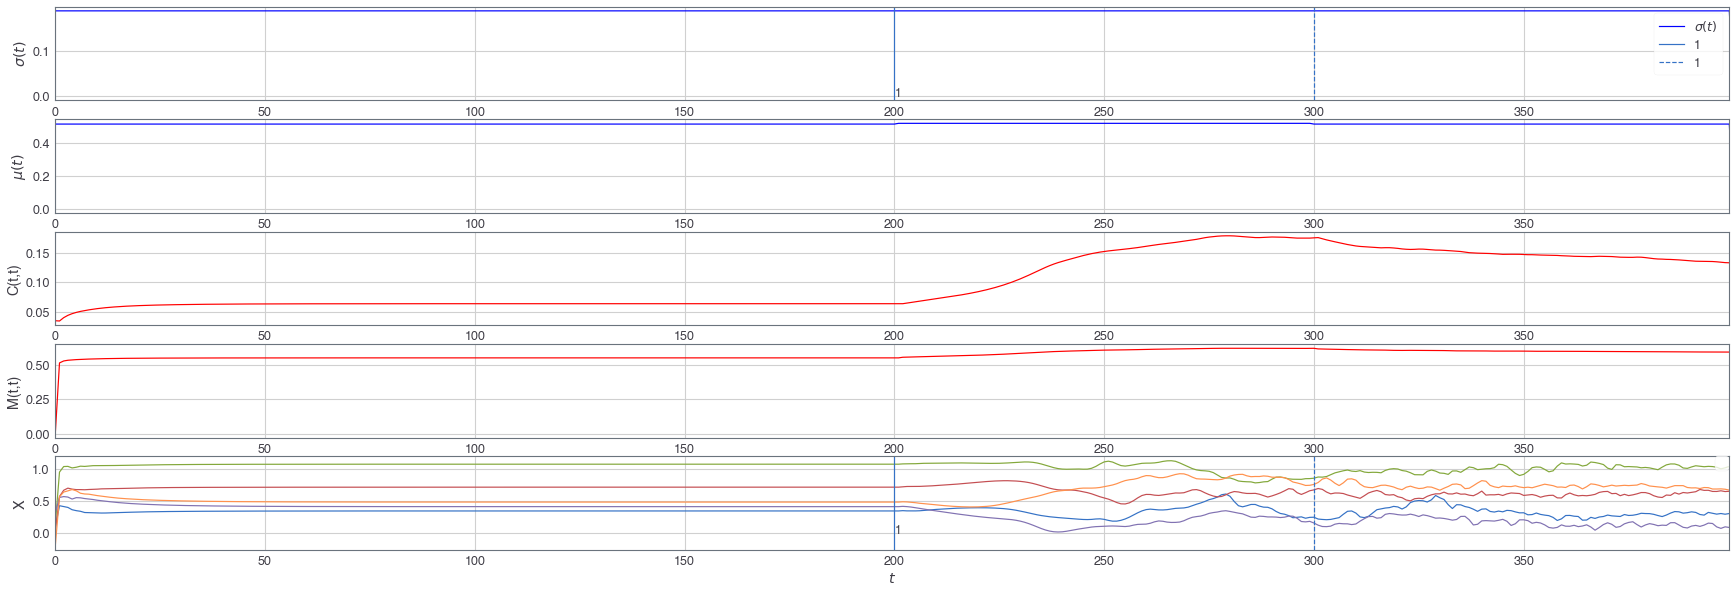

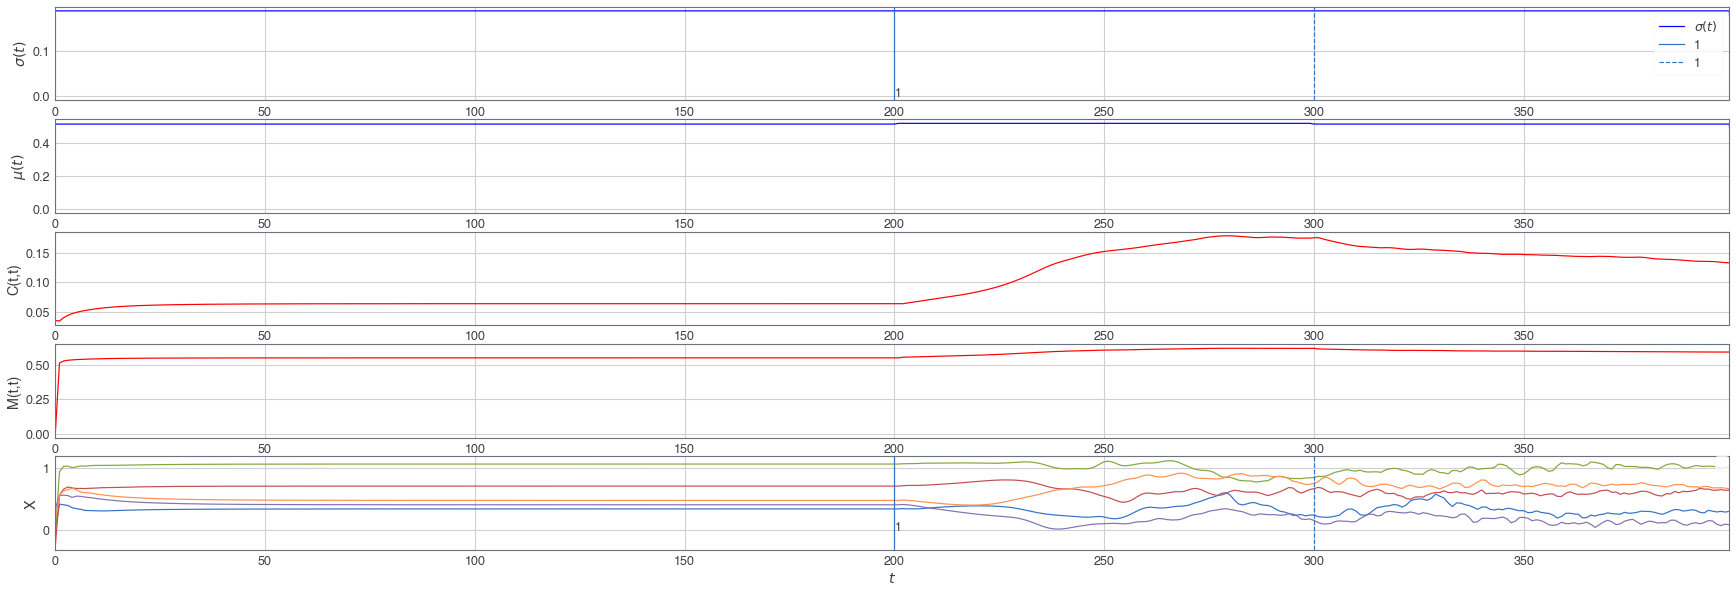

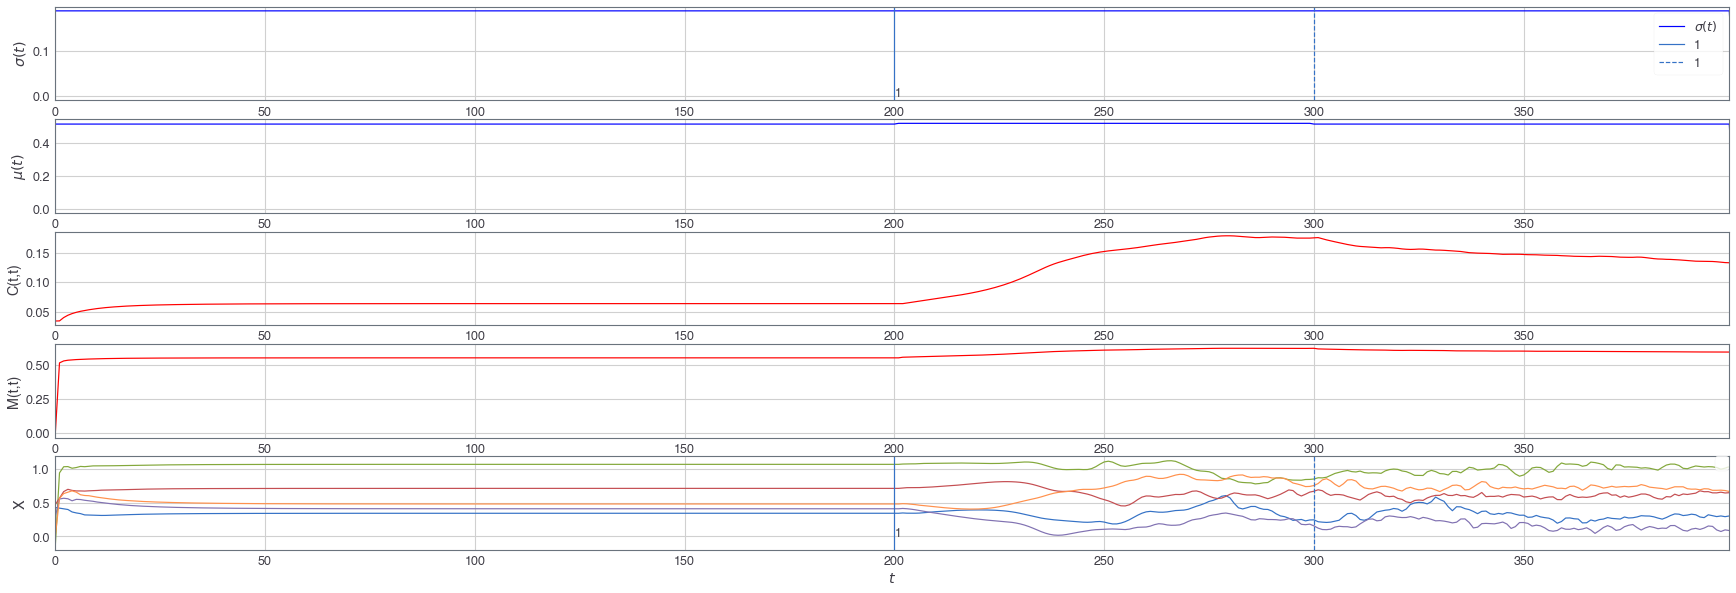

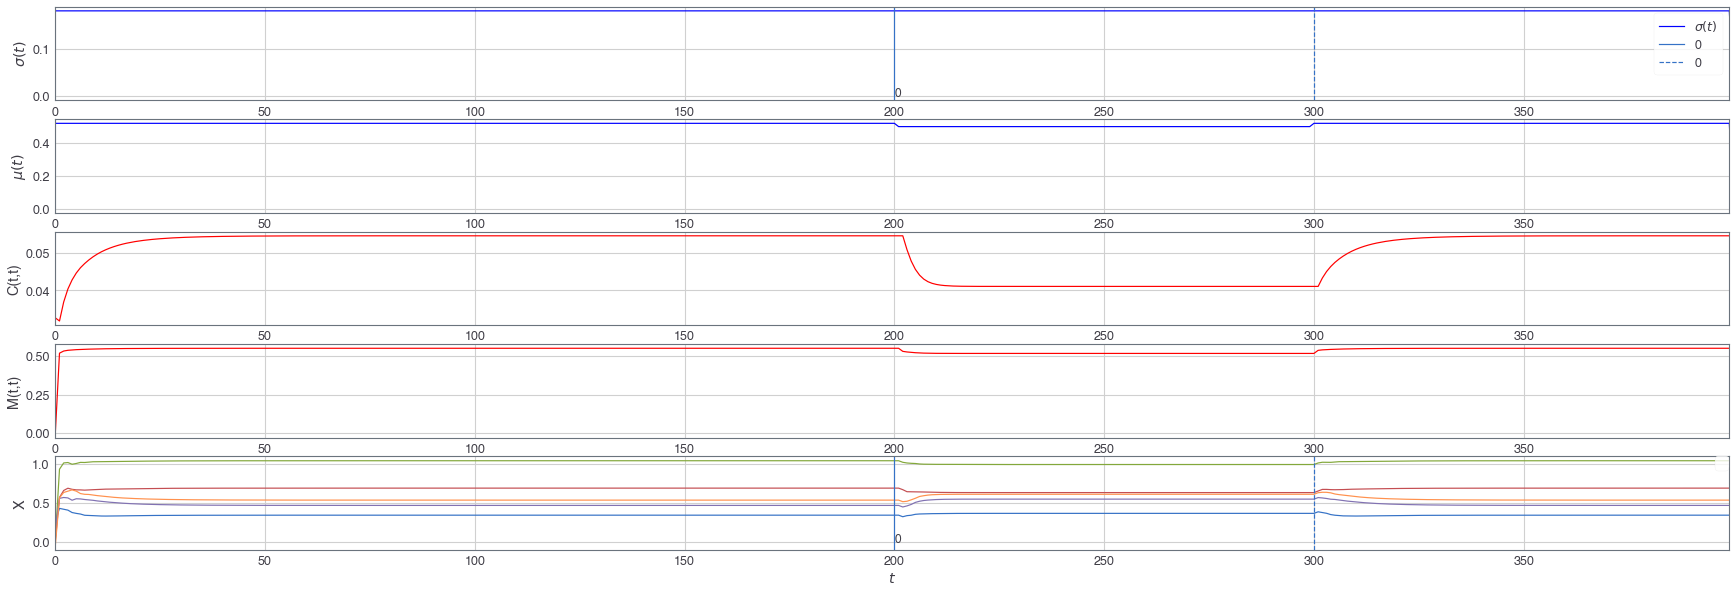

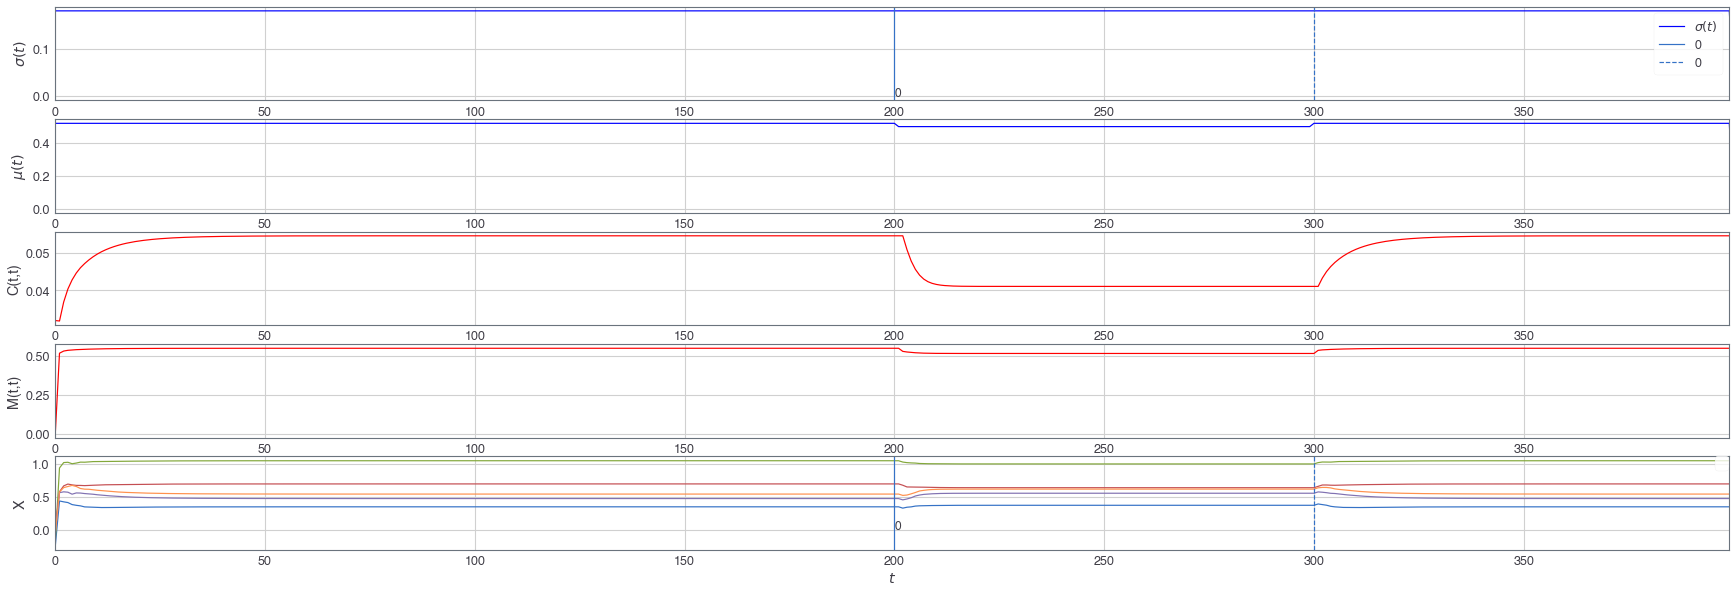

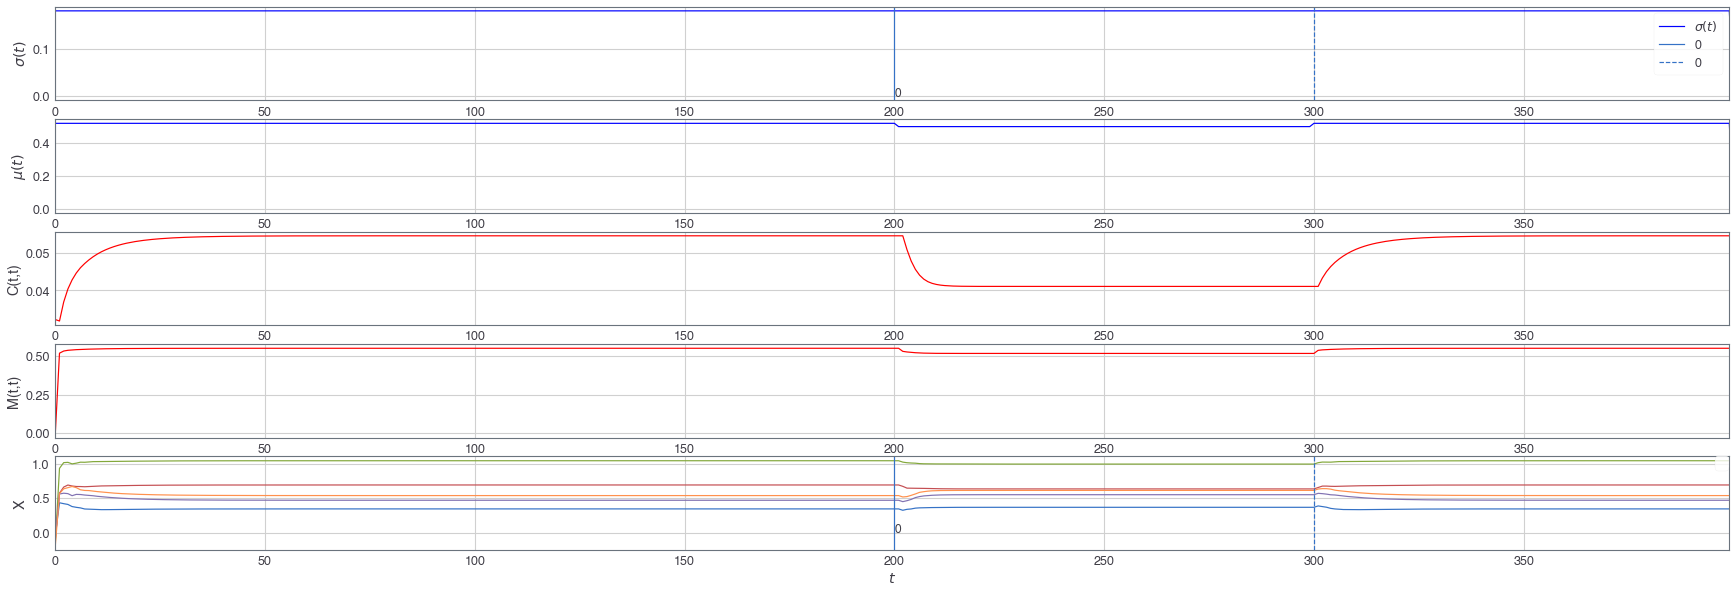

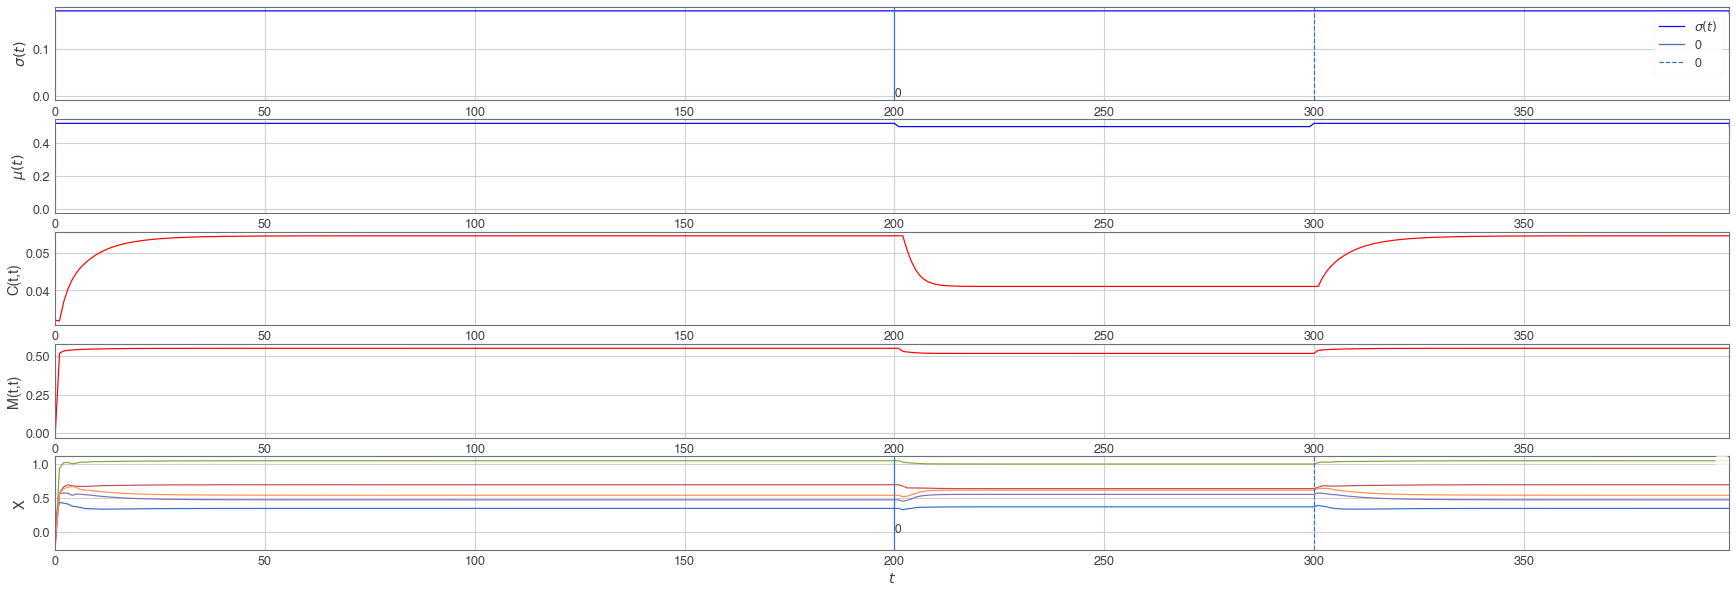

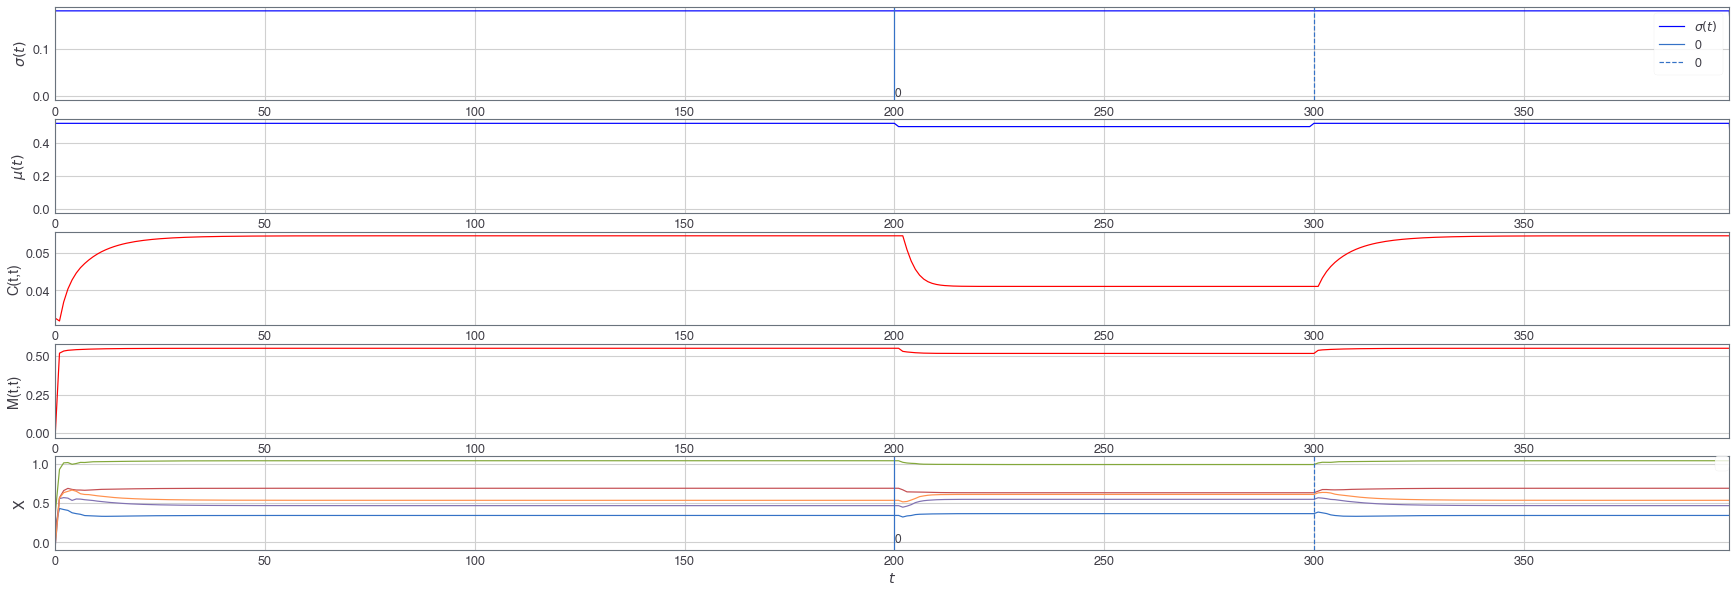

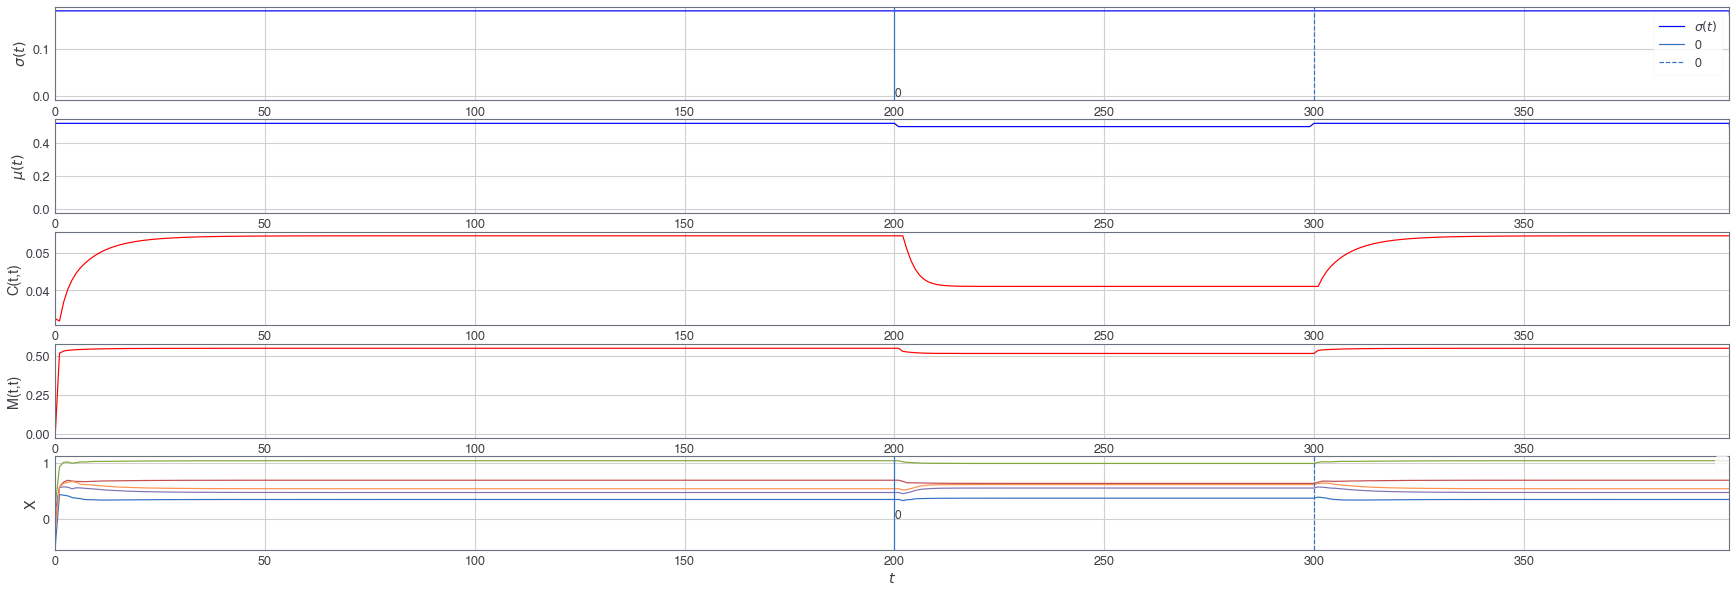

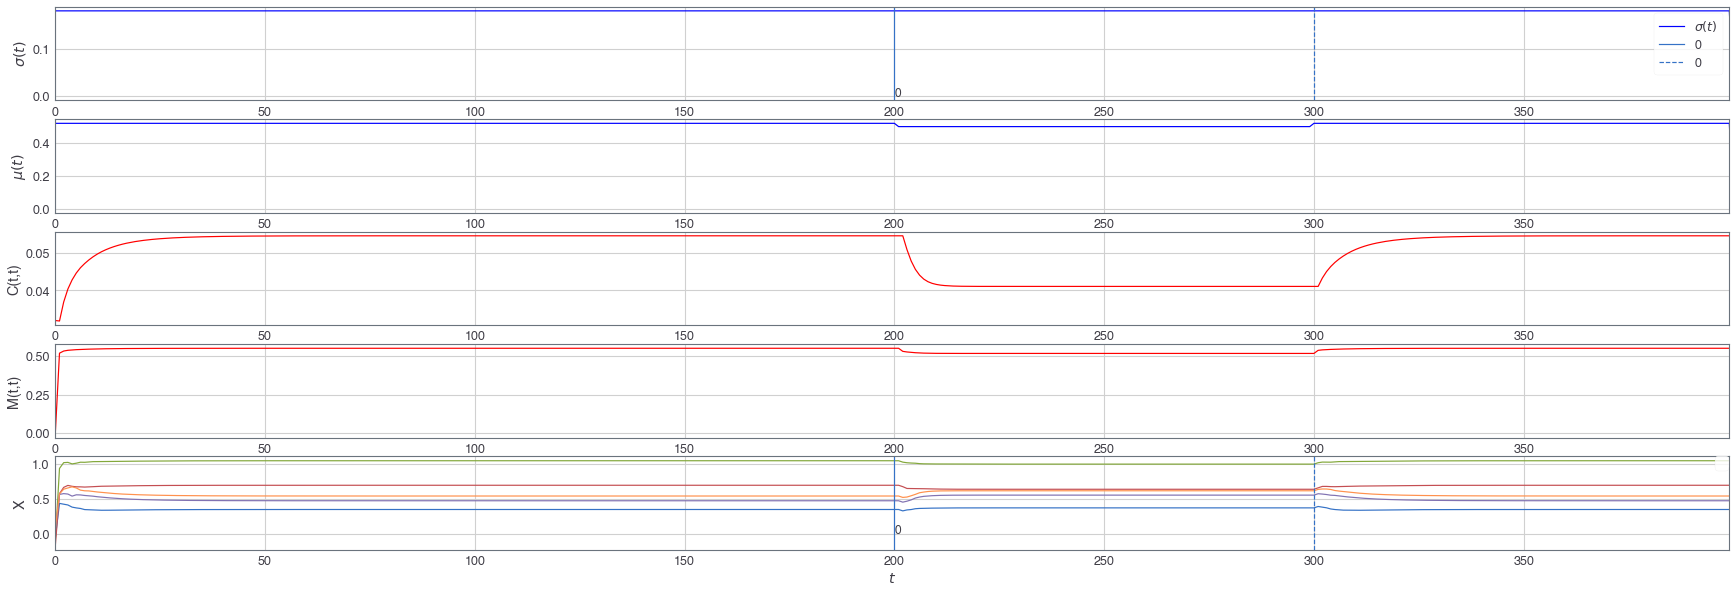

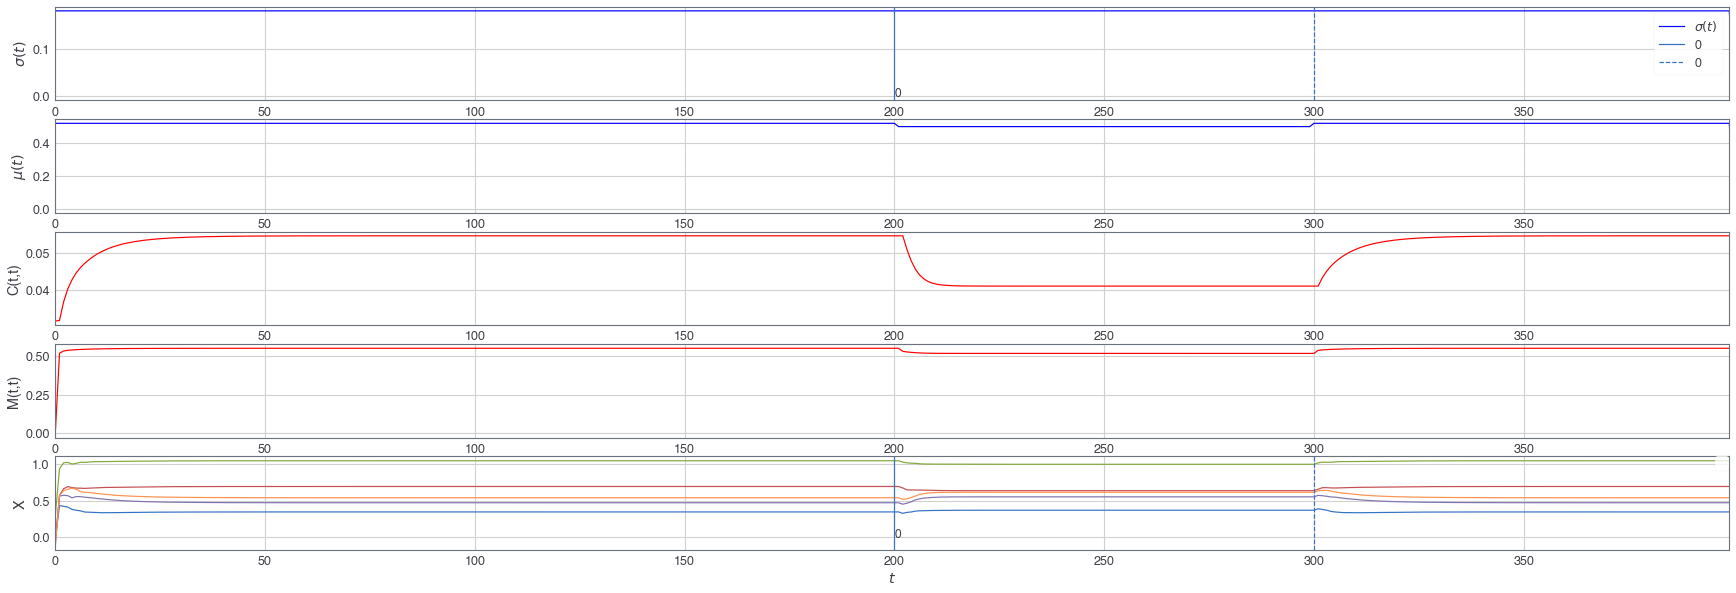

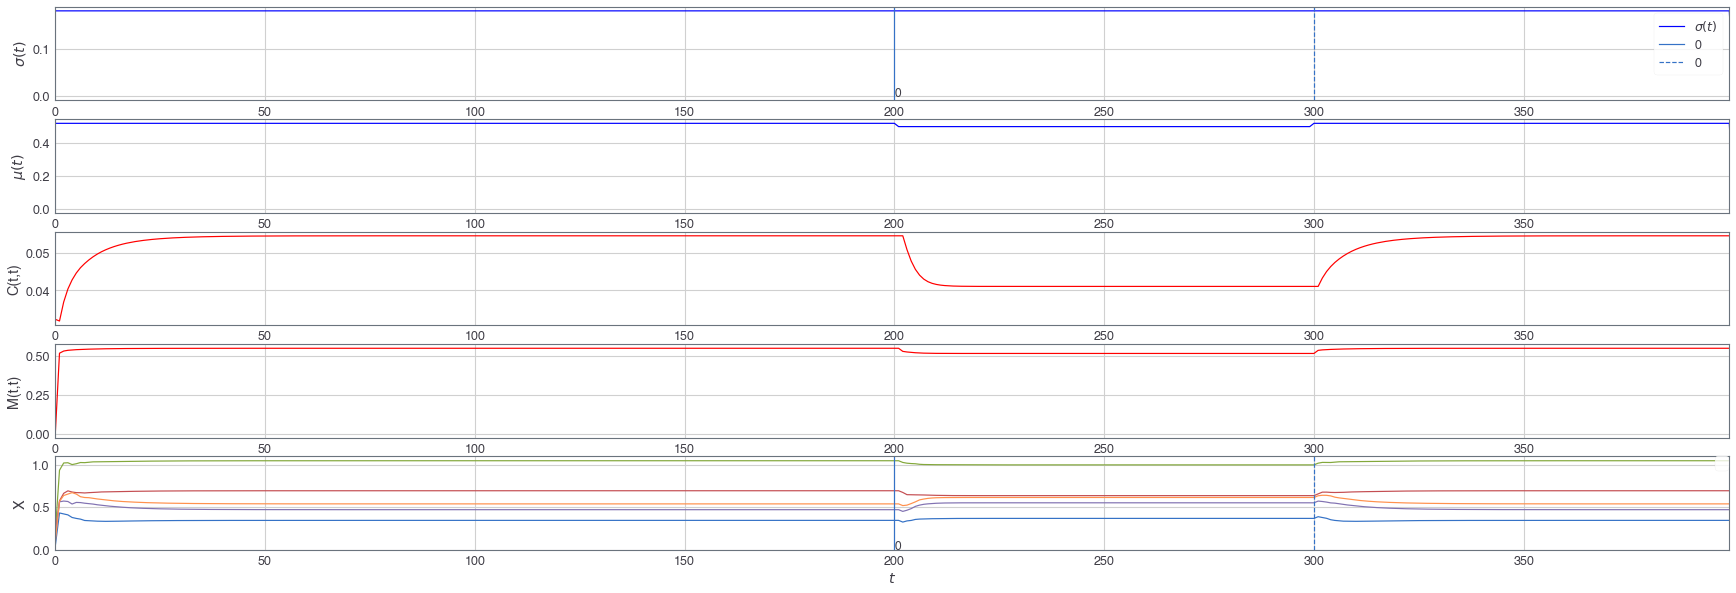

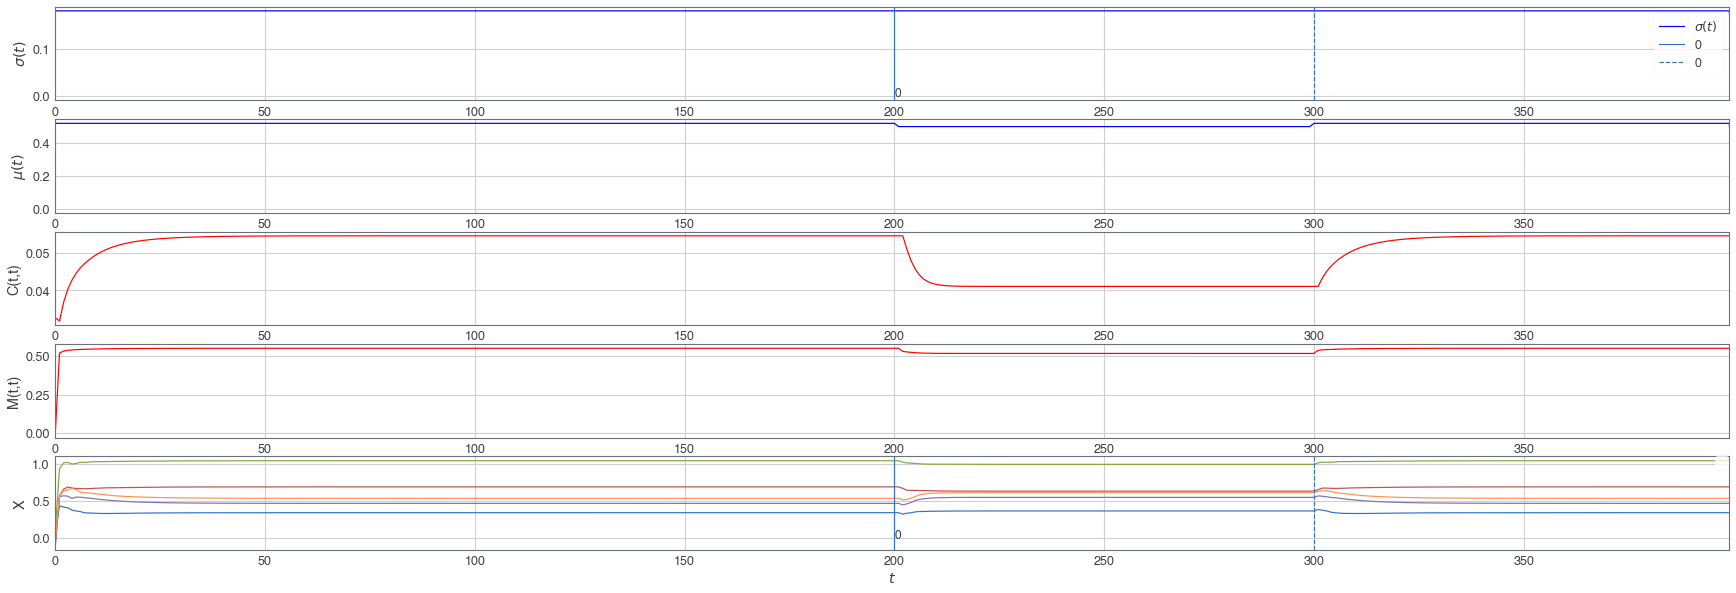

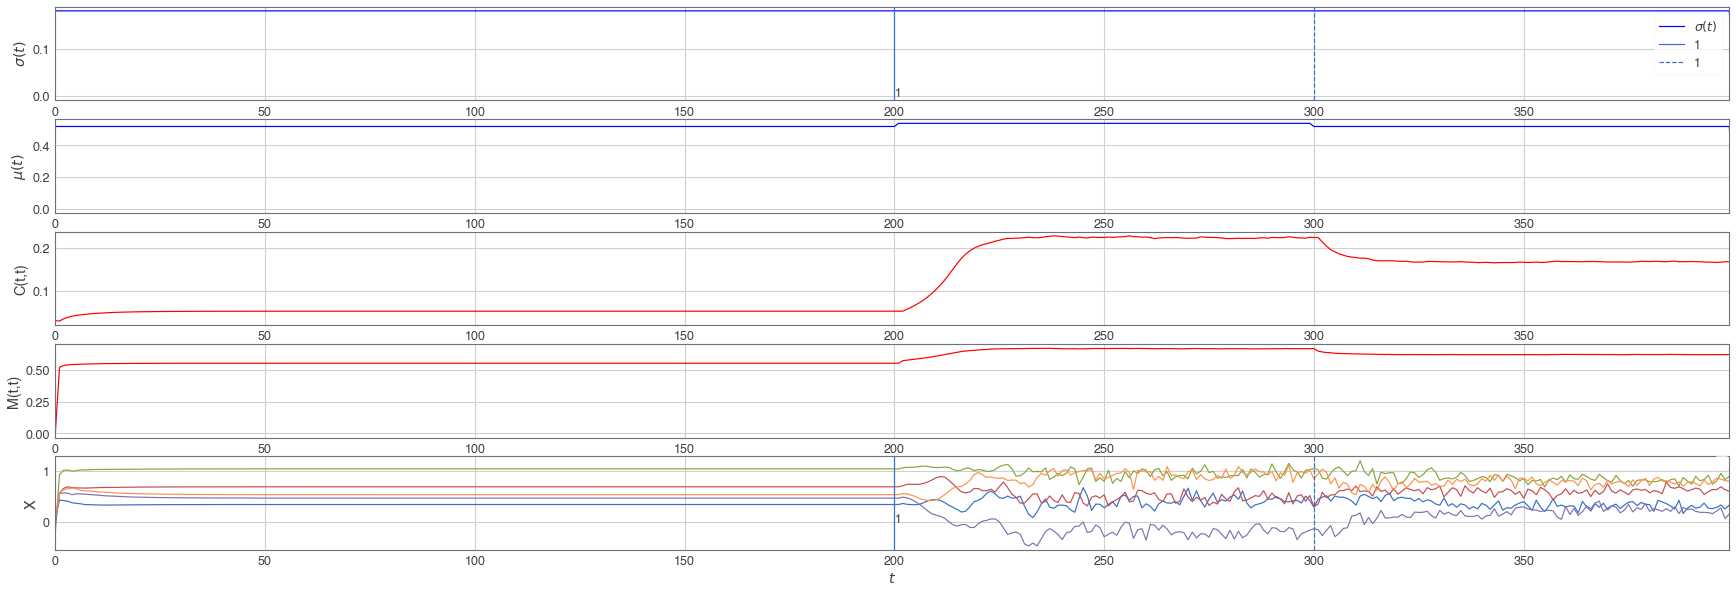

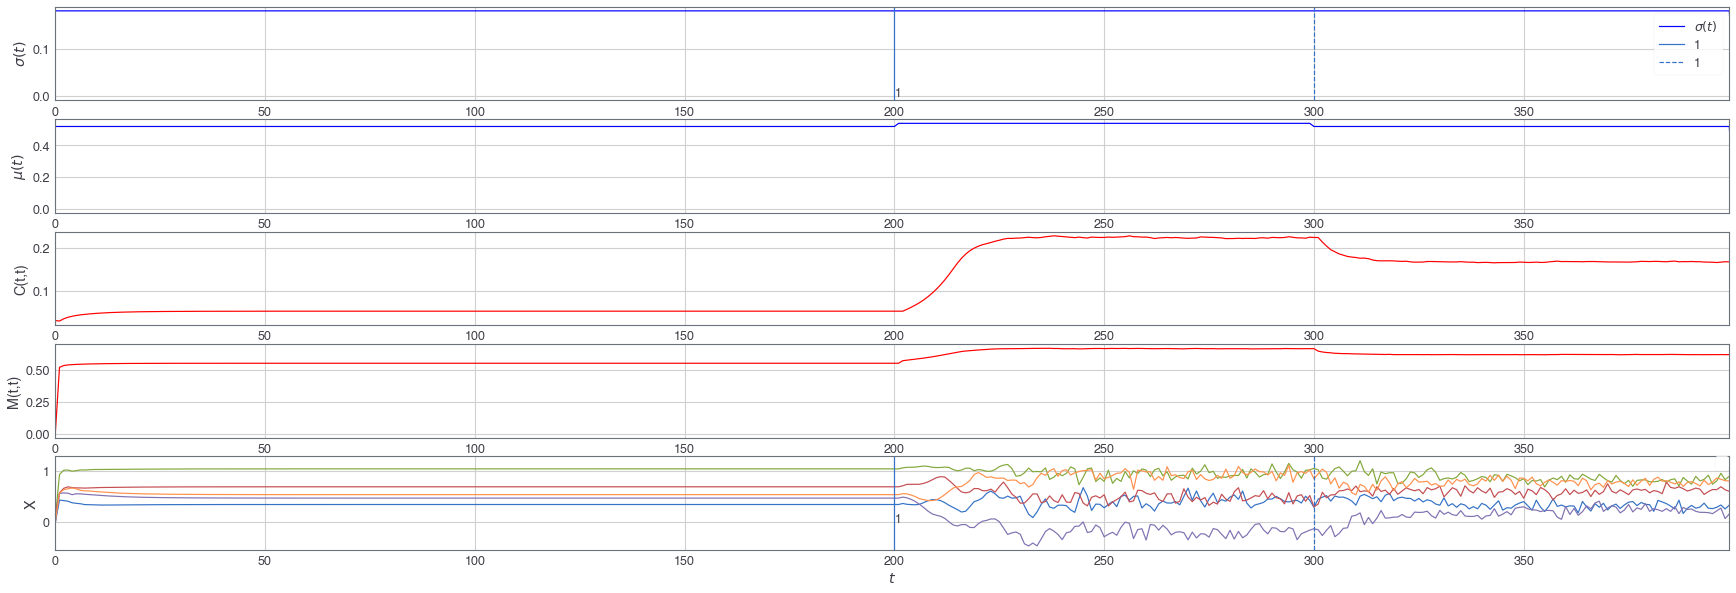

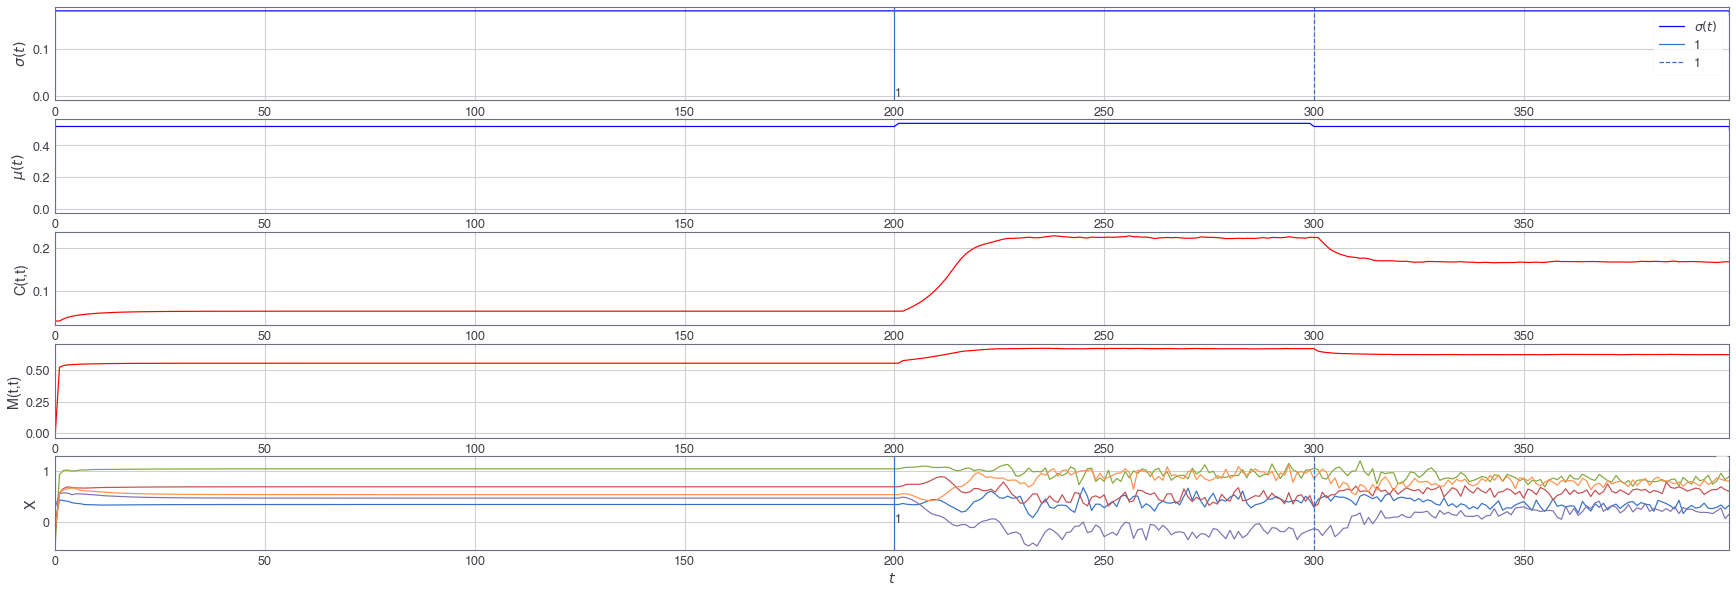

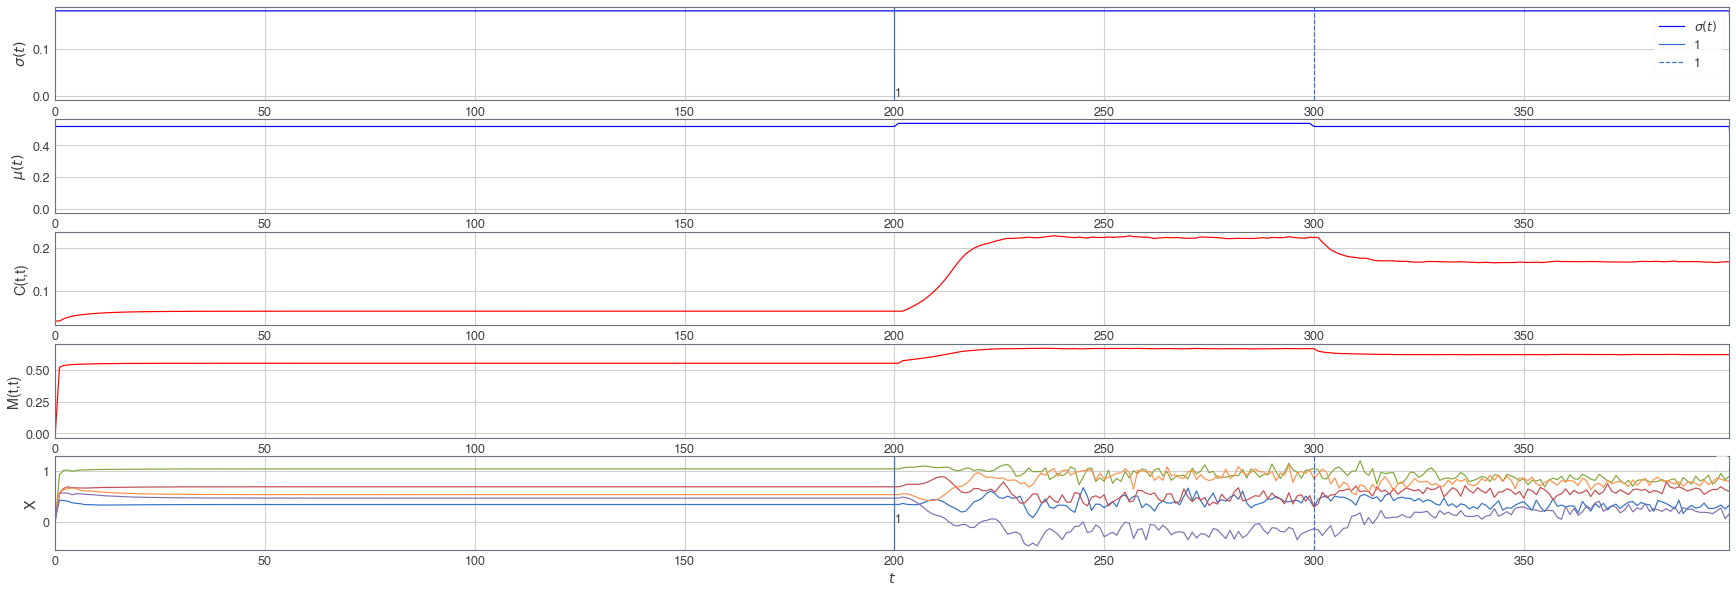

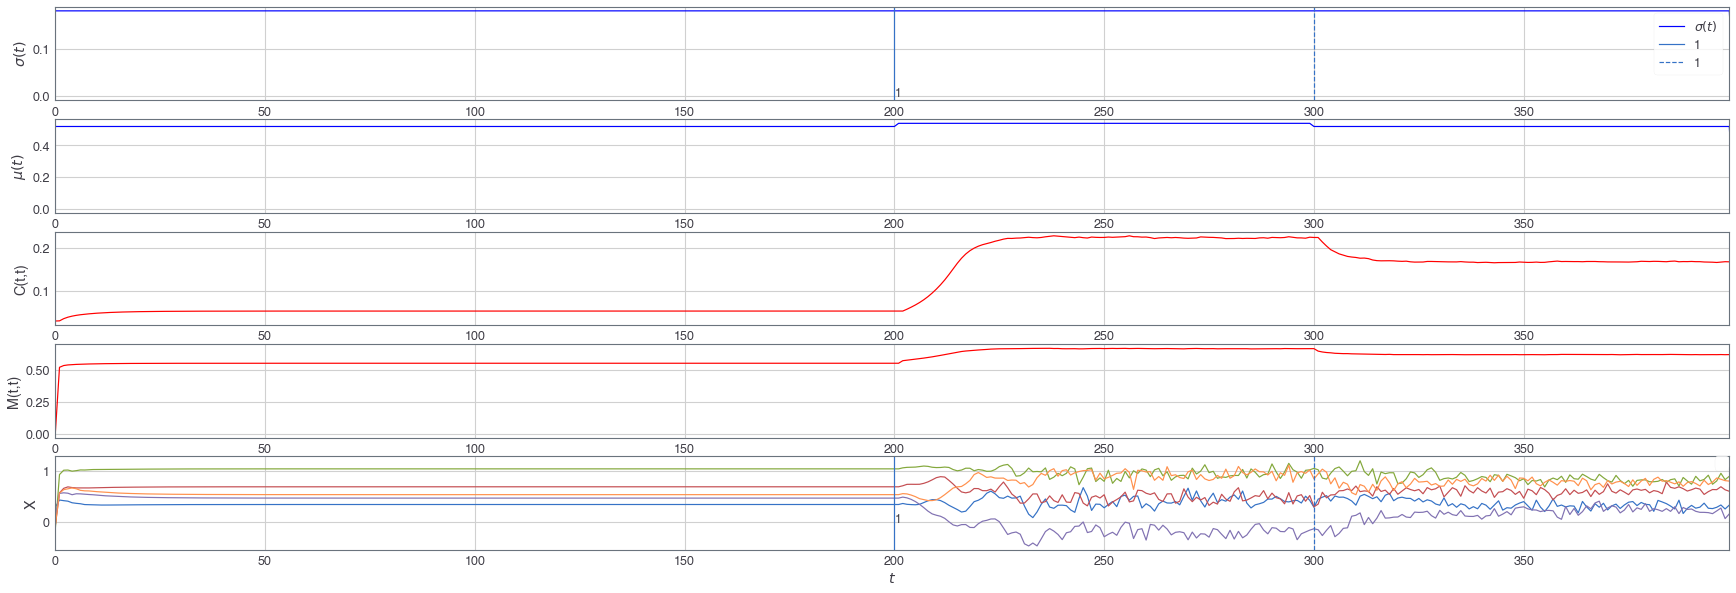

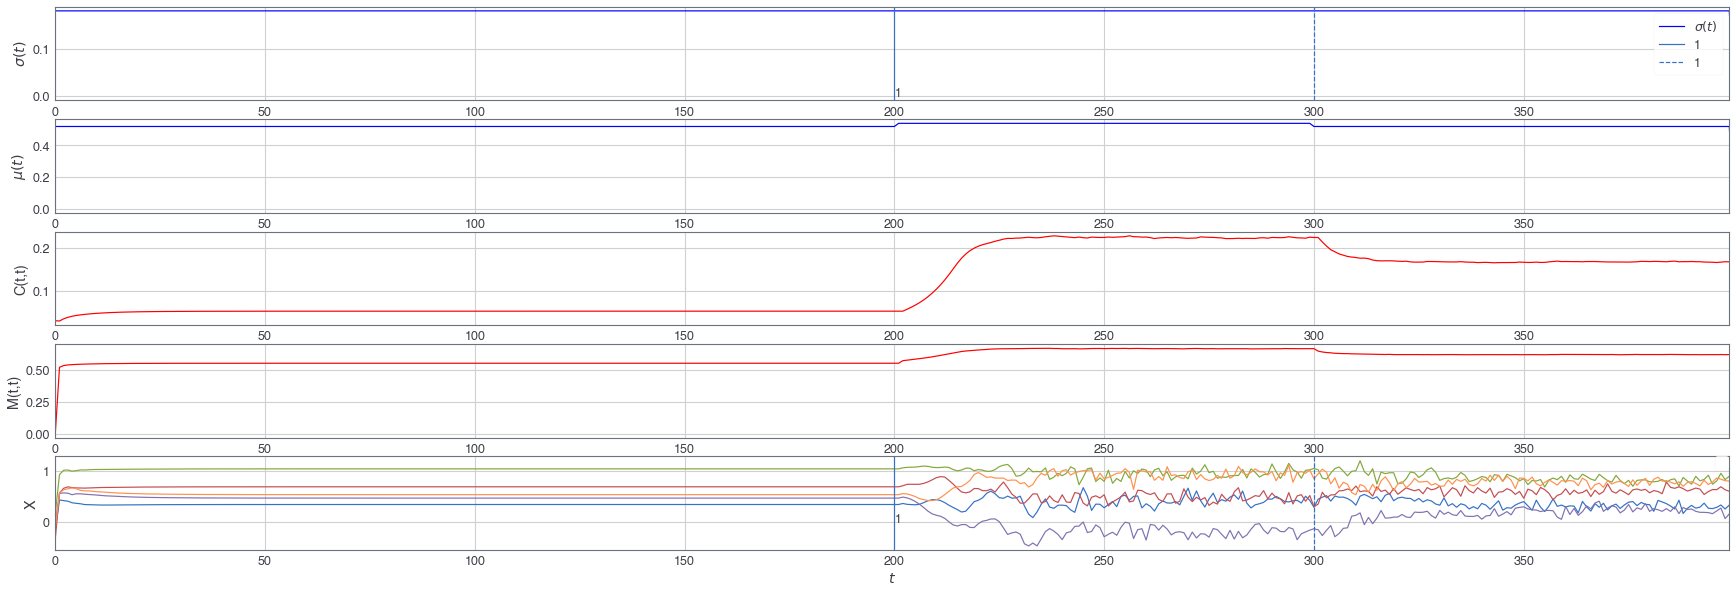

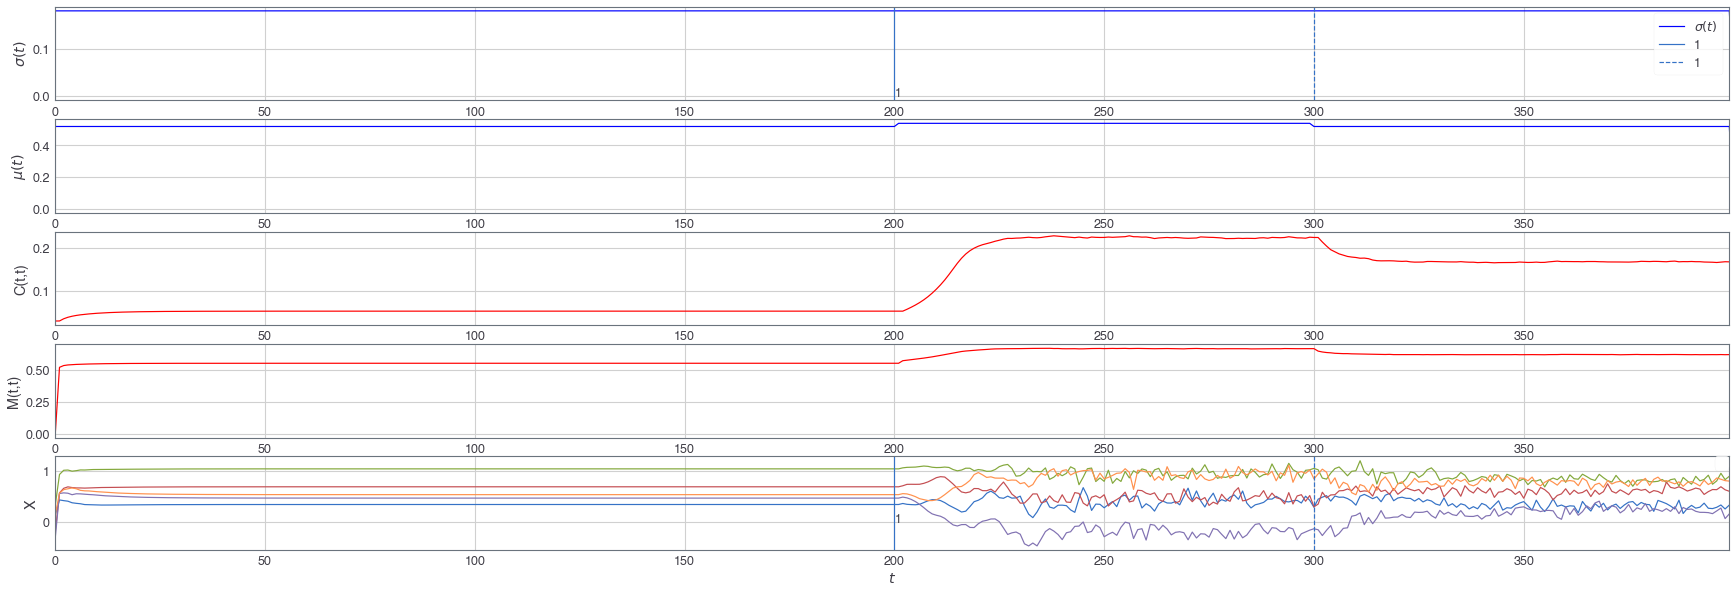

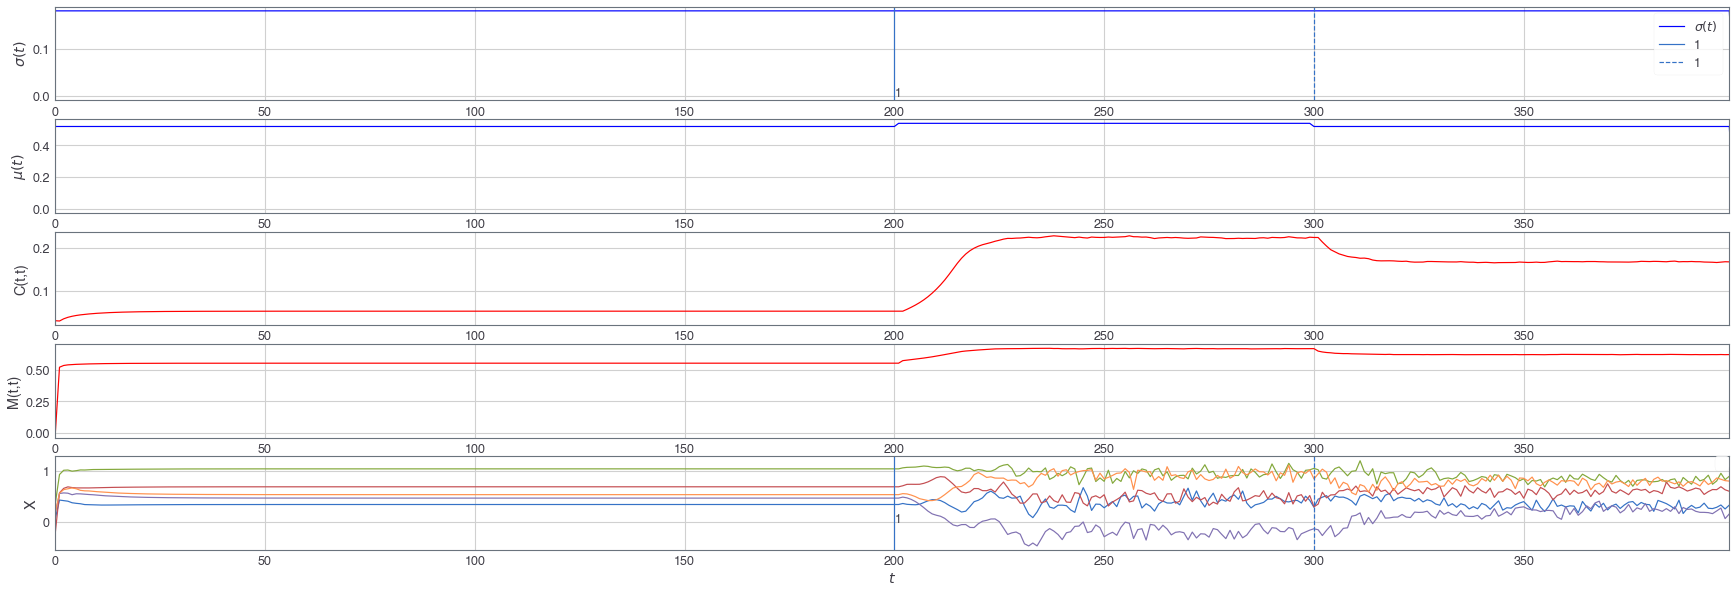

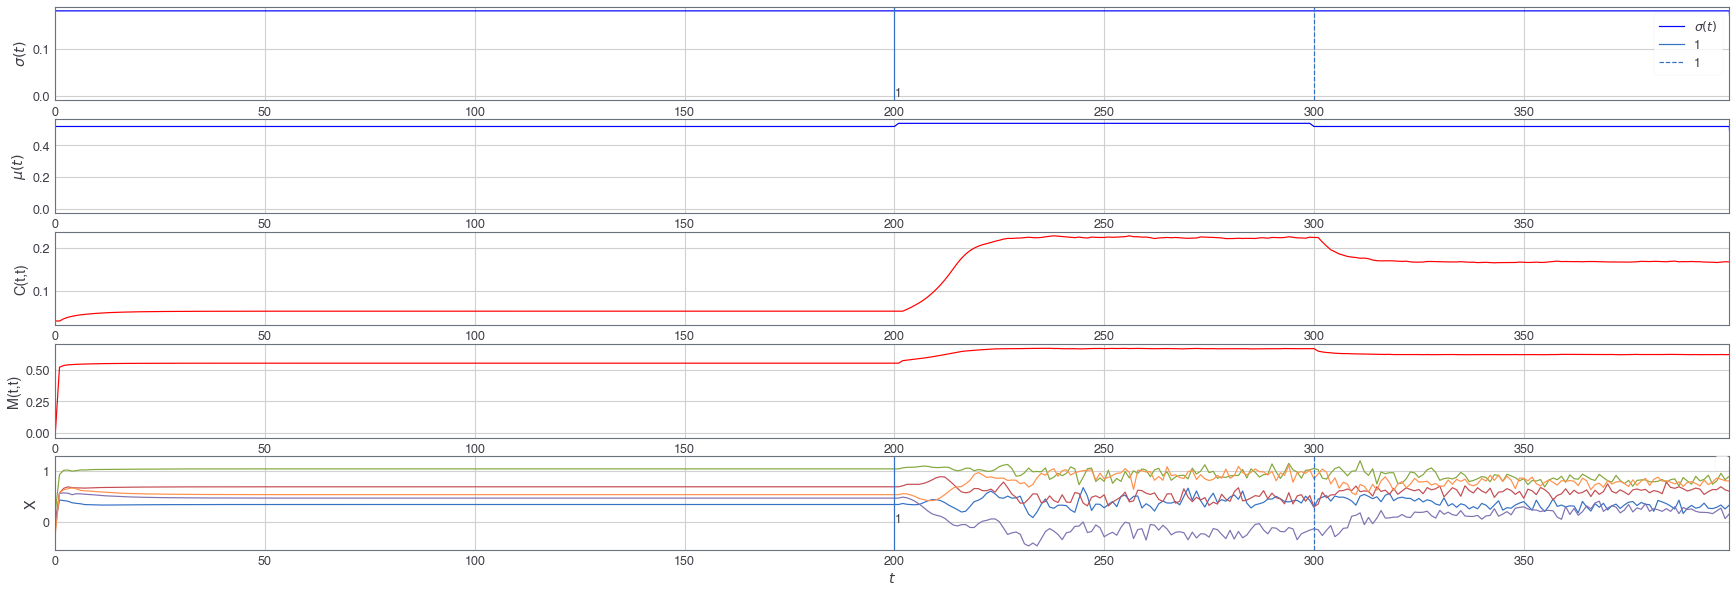

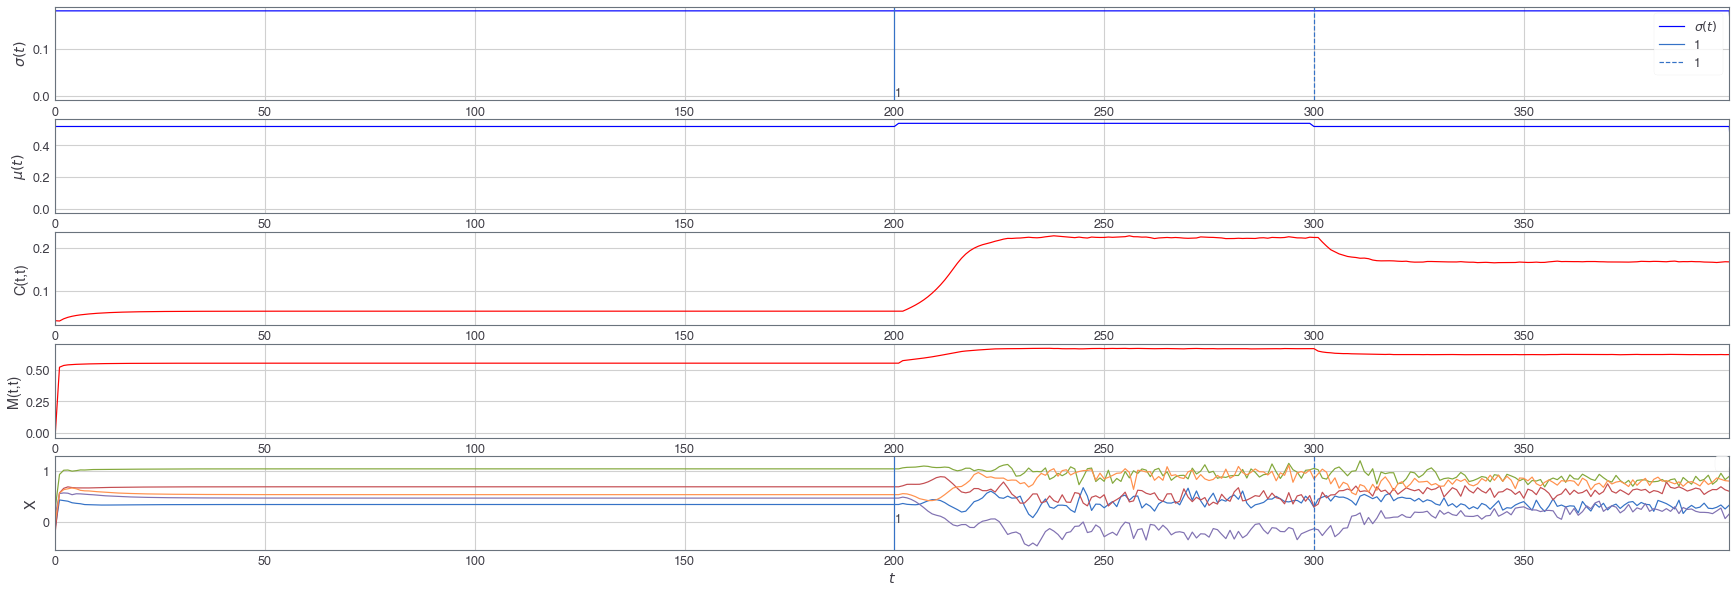

In [9]:
file_data=os.path.join('DATA',"1sim_doubleFP.pickle")
with open(file_data, 'rb') as handle:
    output = pickle.load(handle)
J=output["J"]
quench_noise1=output["quench_noise1"]

ntrials=10
#
stim_interval=200 # interval between 2 cons stimulations
stim_dur=100 # duration of a stimulation
stim_offset=200 # offset of first stim from beginning of sim
stim_times=[stim_offset]

step_n=stim_times[-1]+200
time_onset=[0]; time_offset=[step_n]; 
mu0=0.5125; sigma0=0.1883; # double FP
mu1=0.52; sigma1=0.18;  # FP/chaos
mu_set=[mu0,mu1]; sigma_set=[sigma0,sigma1]

# stimuli for the doubleFP
stim_classdoubleFP=['FP1','FP2']
mu_FP1=0.507; #sigma_FP=0.17; 
mu_FP2=0.517; #sigma_Chaos=0.2
mu_stim_doubleFP=[mu_FP1,mu_FP2] #; sigma_stim=[sigma_FP,sigma_Chaos]
# stimuli for the FP/mu_Chaos
stim_class_FPchaos=['FP','Chaos']
mu_FP=0.5; #sigma_FP=0.17; 
mu_Chaos=0.54; #sigma_Chaos=0.2
mu_stim_FPchaos=[mu_FP,mu_Chaos] #; sigma_stim=[sigma_FP,sigma_Chaos]
mu_stim=[mu_stim_doubleFP,mu_stim_FPchaos]
stim_class=[stim_classdoubleFP,stim_class_FPchaos]
n_rules=2
n_class=len(stim_class[0])

results={}

parameters1={"neuron_n":neuron_n,"replica_n":replica_n,"step_n":step_n,"time_slice":time_slice,"act_type":act_type} 
print(parameters1)
for irule in range(n_rules):
    for iclass in range(n_class):
        for itrial in range(ntrials):
            results[irule,iclass,itrial]={}
            stim=[mu_stim[irule][iclass]]; stim_labels=[iclass]
            task_rule={'mu':[mu_set[irule]],'sigma':[sigma_set[irule]],'time_onset':time_onset,'time_offset':time_offset}
            initial_var=sigma_set[irule]
            stim_data={"stim":stim,"stim_times":stim_times,'stim_labels':stim_labels,"stim_interval":stim_interval,"stim_dur":stim_dur,"stim_offset":stim_offset,'jitter':False}
            parameters5={"g_scale":g_scale,"J_bias":J_bias,"mu":mu,"theta":theta,"c":c,"sigma_ind":sigma_ind,"initial_var":initial_var,"stim_data":stim_data,"J":J,'quench_noise1':quench_noise1,"task_rule":task_rule} 
            # print(parameters5)


            start = time.time()
            RRNNN = rn.RecurrentRandomNeuralNetworkNbody(**parameters1)

            output = RRNNN.evolve_rrnn_switch(**parameters5)
            pdffigname = "switch_g"+str(g_scale)+"_Jbias"+str(J_bias)+"_c"+str(c)+"_theta"+str(theta)+"_neuron_n"+str(neuron_n)+".pdf"
            rn.plot_time_course_stim(step_n,output,stim_data,time_slice,[])
            output["J"]=[]
            output["quench_noise1"]=[]
            results[irule,iclass,itrial]['output']=output


### Train an LDA decoders to discriminate 1) between different task rules, and 2) within each task rules, between the two stimulus classes 

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

n_rules=2
n_class=len(stim_class[0])
n_points=20
readout_stim=[i*2+(stim_times[0]+stim_dur+50) for i in range(n_points)]
# readout_rule=[i*5+(stim_times[0]-50) for i in range(n_points)]
nrecorded=1000 # stored neurons

# collect activity
xdata_stim=np.zeros((n_rules,n_points*n_class*ntrials,nrecorded))
ydata_stim=np.zeros((n_rules,n_points*n_class*ntrials))
xdata_rule=np.zeros((n_points*n_rules*n_class*ntrials,nrecorded))
ydata_rule=np.zeros((n_points*n_rules*n_class*ntrials))

cnt_rule=0
for irule in range(n_rules):
    cnt=0
    for iclass in range(n_class):
        for itrial in range(ntrials):
            for ipoint in range(n_points):
                Xtemp=results[irule,iclass,itrial]["output"]["X"]
                X= Xtemp.cpu().detach().numpy()
                xdata_stim[irule,cnt,:]=X[:,readout_stim[ipoint]]
                ydata_stim[irule,cnt]=iclass
                xdata_rule[cnt_rule,:]=X[:,readout_stim[ipoint]]
                ydata_rule[cnt_rule]=irule
                cnt=cnt+1; cnt_rule=cnt_rule+1
            
# initialize two readouts: one for the task_rule, and one for the stimulus class within each task rule
clf = LinearDiscriminantAnalysis(n_components=1)
readouts={"LDA_rule":clf,"stim":{}}
for irule in range(n_rules):
    clf = LinearDiscriminantAnalysis(n_components=1)
    readouts["stim"][irule]={"LDA_stim":clf}

cv = KFold(n_splits=5)

# rule decoder
fit_lda=readouts["LDA_rule"].fit(xdata_rule,ydata_rule) # readout for task rule
scores = cross_val_score(clf, xdata_rule, ydata_rule, scoring='accuracy', cv=cv, n_jobs=-1)
print('cv accuracy for rule decoding',scores)
print(str(scores))
#stim decoder
for irule in range(n_rules):
    fit_lda=readouts['stim'][irule]["LDA_stim"].fit(xdata_stim[irule],ydata_stim[irule]) # readout for stim class
    scores = cross_val_score(clf, xdata_stim[irule], ydata_stim[irule], scoring='accuracy', cv=cv, n_jobs=-1)
    print('cv accuracy for stim decoding in rule ',str(irule))
    print(str(scores))

file_data=os.path.join('DATA',"1sim_doubleFP_decoder.pickle")
with open(file_data, 'wb') as fp:
    pickle.dump(readouts, fp, protocol=pickle.HIGHEST_PROTOCOL)# with open(file_data, 'r') as f:



cv accuracy for rule decoding [1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
cv accuracy for stim decoding in rule  0
[1. 1. 1. 1. 1.]
cv accuracy for stim decoding in rule  1
[1. 1. 1. 1. 1.]
